# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    #Seperate X_train to calculate covariance
    X_train_pos = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == 1]
    X_train_neg = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == -1]
    #means
    mean_pos = np.mean(X_train_pos, axis=0)
    mean_neg = np.mean(X_train_neg, axis=0)
    #find p(Y=1)=a and p(Y=-1) = 1-a
    a = np.mean(Y_train==1)
    n= len(X_test)
    Y_test_pred = np.ones(n)
    #loop to find Y_test_pred using ______
    for i in range(0,n):
      #norm
      p = (np.sum((X_test[i] - mean_pos)**2))**0.5
      q = (np.sum((X_test[i] - mean_neg)**2))**0.5
      eps = a*np.exp(-0.5*p**2)
      eps = eps/(a*np.exp(-0.5*p**2)+(1-a)*np.exp(-0.5*q**2))
      if(eps>0.5):
        Y_test_pred[i]=1
      else:
        Y_test_pred[i]=-1

    return(Y_test_pred)


def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    #Seperate X_train to calculate covariance
    X_train_pos = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == 1]
    X_train_neg = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == -1]
    #means
    mean_pos = np.mean(X_train_pos, axis=0)
    mean_neg = np.mean(X_train_neg, axis=0)

    covar = (len(X_train_pos)*np.cov(X_train_pos,rowvar= False, bias = True)+ len(X_train_neg)*np.cov(X_train_neg,rowvar= False, bias = True))/len(X_train)
    #bias set to true -> prefactor = 1/N

    #find p(Y=1)=a and p(Y=-1) = 1-a
    a = np.mean(Y_train==1)
    n= len(X_test)
    Y_test_pred = np.ones(n)
    #loop to find Y_test_pred using ______
    for i in range(0,n):
      #norm
      p = (X_test[i] - mean_neg) @ np.linalg.inv(covar) @ (X_test[i] - mean_neg)
      q = (X_test[i] - mean_pos) @ np.linalg.inv(covar) @ (X_test[i] - mean_pos)
      eps_exp = np.exp(-0.5*(p-q))
      eps_frac = (1-a)/a
      eps = 1/(1+eps_frac*eps_exp)
      if(eps>0.5):
        Y_test_pred[i]=1
      else:
        Y_test_pred[i]=-1

    return(Y_test_pred)

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
     #Seperate X_train to calculate covariance
    X_train_pos = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == 1]
    X_train_neg = [X_train[i] for i in range(len(Y_train)) if Y_train[i] == -1]
    #means
    mean_pos = np.mean(X_train_pos, axis=0)
    mean_neg = np.mean(X_train_neg, axis=0)

    cov_pos = np.cov(X_train_pos,rowvar= False, bias = True)
    cov_neg = np.cov(X_train_neg,rowvar= False, bias = True)
    #bias set to true -> prefactor = 1/N

    #find p(Y=1)=a and p(Y=-1) = 1-a
    a = np.mean(Y_train==1)
    n= len(X_test)
    Y_test_pred = np.ones(n)
    #loop to find Y_test_pred using ______
    for i in range(0,n):
      #norm
      p =  np.dot(np.dot(np.transpose(X_test[i]-mean_neg),np.linalg.inv(cov_neg)),X_test[i]-mean_neg)
      q = np.dot(np.dot(np.transpose(X_test[i]-mean_pos),np.linalg.inv(cov_pos)),X_test[i]-mean_pos)

      eps_exp = np.exp(-0.5*(p-q))
      eps_frac = (1-a)/a
      #square root of determinants of covariances
      det_cov_pos = np.sqrt(np.linalg.det(cov_pos))
      det_cov_neg = np.sqrt(np.linalg.det(cov_neg))

      eps = 1/ (1 + (eps_frac * eps_exp * det_cov_pos/det_cov_neg ))
      if(eps>0.5):
        Y_test_pred[i]=1
      else:
        Y_test_pred[i]=-1

    return(Y_test_pred)


In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


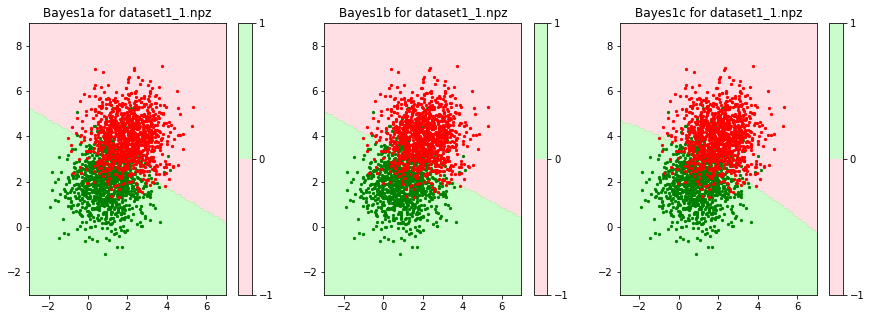

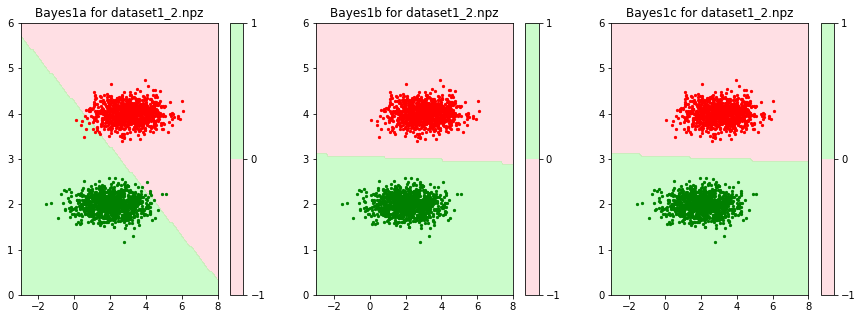

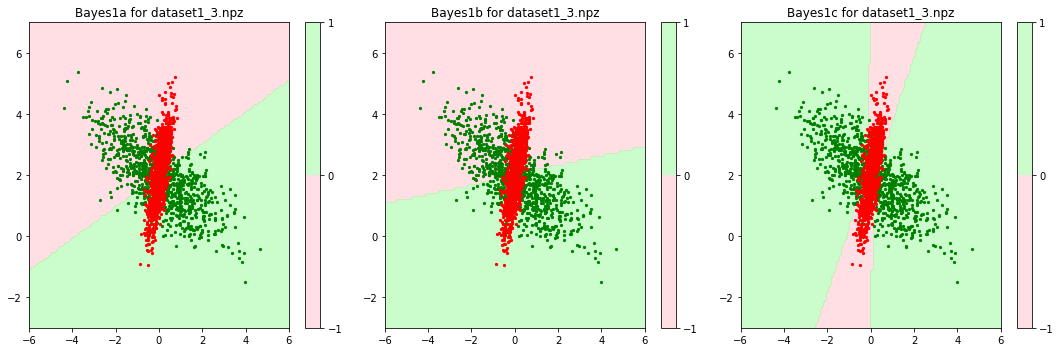

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

#List to store data as tuple
data_sets = []
for ds in ['dataset1_1.npz', 'dataset1_2.npz', 'dataset1_3.npz']:

    data = np.load(ds)
    # Extract data
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    data_sets.append((X_train, Y_train, X_test, Y_test))

    for X_train, Y_train, X_test, Y_test in data_sets:
        # Splitting the train set according to Y values
        X_train_pos = X_train[Y_train == 1]
        X_train_neg = X_train[Y_train == -1]

    #Limits for plotting
    lim_0 = np.linspace(np.floor(np.min(X_train[:,0])) - 1, np.ceil(np.max(X_train[:,0])) + 1, 100)
    lim_1 = np.linspace(np.floor(np.min(X_train[:,1])) - 1, np.ceil(np.max(X_train[:,1])) + 1, 100)
    X_test_1, X_test_2 = np.meshgrid(lim_0, lim_1)

    Y_test_1a, Y_test_1b, Y_test_1c = [np.zeros(X_test_1.shape) for _ in range(3)]


    for i in range(Y_test_1a.shape[0]):
        X_test_all = np.concatenate((X_test_1[i,:],X_test_2[i,:]))
        X_test_all = X_test_all.reshape(2,Y_test_1a.shape[0])
        X_test_all = np.transpose(X_test_all)
        Y_test_1a[i,:] = Bayes1a(X_train,Y_train,X_test_all)
        Y_test_1b[i,:] = Bayes1b(X_train,Y_train,X_test_all)
        Y_test_1c[i,:] = Bayes1c(X_train,Y_train,X_test_all)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, Y_test_any in enumerate([Y_test_1a, Y_test_1b, Y_test_1c]):
        ax = axs[i]  
        d = ax.contourf(X_test_1, X_test_2, Y_test_any, levels=np.arange(-1, 2), colors=('pink', 'palegreen'), alpha=0.5)
        ax.set_title('Bayes1' + chr(ord('a') + i) + ' for ' + str(ds))
        # Scatter plot 
        ax.scatter(X_train_pos[:, 0], X_train_pos[:, 1], color='g', s=5)
        ax.scatter(X_train_neg[:, 0], X_train_neg[:, 1], color='r', s=5)
        plt.colorbar(d,ax=ax)

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot


** Cell type : TextWrite **
(Write your observations and table of errors here)

# Observations:
    1) Bayes1c provides better classification to the all the datasets than Bayes1a and Bayes1b
    2) Bayes1c has a quadratic decision boundary as shown in countour plot for dataset1_3 while both Bayes1a and Bayes 1b are linear.
    3)Bayes1a works well for normal datasets with covariance known, Bayes1b works for normal datasets with unknown covariance.
 # Error Table:
 
| Error % | Data Set 1 | Data Set 2 | Data Set 3 |
|---------|------------|------------|------------|
| Bayes1a |    12.5    |    0.9     |    50      |
| Bayes1b |    12.35   |      0     |    50      |
| Bayes1c |    12.35   |      0     |    14.2    |


** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [8]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    """
    X_train_arr = [[] for _ in range(4)]

    # splitting the train set according to Y values
    for i in range(len(Y_train)):
        X_train_arr[int(Y_train[i])-1].append(X_train[i])


    #means
    mean = [[] for _ in range(4)]
    for i in range (4):
      mean[i] = np.mean(X_train_arr[i],axis =0)
    mean_arr = np.array(mean)

    #probabilities of y being 1,2,3,4
    p =  [[] for _ in range(4)]
    for i in range (4):
      p[i] = np.count_nonzero(Y_train == i+1)/len(Y_train)
    p_arr = np.array(p)

    #loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    Y_test_pred = np.ones(len(X_test))
    post_prob = np.zeros(4)
    for i in range(len(X_test)):
        prob_sum = 0
        for j in range(4):
            post_prob[j] = p[j]*np.exp(-0.5*np.dot(np.transpose(X_test[i]-mean[j]),X_test[i]-mean[j]))
            prob_sum += post_prob[j]
        #Normalizing
        post_prob = post_prob/prob_sum
        Y_test_pred[i] = np.argmin(np.dot(post_prob,L))+1

    return(Y_test_pred)

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    X_train_arr = [[] for _ in range(4)]

    # splitting the train set according to Y values
    for i in range(len(Y_train)):
        X_train_arr[int(Y_train[i])-1].append(X_train[i])

    #means
    mean = [[] for _ in range(4)]
    for i in range (4):
      mean[i] = np.mean(X_train_arr[i],axis =0)
    mean_arr = np.array(mean)

    #covariances
    cov = [[] for _ in range(4)]
    for i in range (4):
      cov[i] = np.cov(X_train_arr[i],rowvar = False,bias = True)
    covar = sum(len(X_train_arr[i]) * cov[i] for i in range(4)) / len(X_train)

    #probabilities of y being 1,2,3,4
    p =  [[] for _ in range(4)]
    for i in range (4):
      p[i] = np.count_nonzero(Y_train == i+1)/len(Y_train)
    p_arr = np.array(p)

    #loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    Y_test_pred = np.ones(len(X_test))
    post_prob = np.zeros(4)
    for i in range(len(X_test)):
        prob_sum = 0
        for j in range(4):
            post_prob[j] = p[j] * np.exp(-0.5 * np.dot(np.dot(np.transpose(X_test[i] - mean[j]), np.linalg.inv(covar)), X_test[i] - mean[j]))
            prob_sum += post_prob[j]
        #Normalizing
        post_prob = post_prob/prob_sum
        Y_test_pred[i] = np.argmin(np.dot(post_prob,L))+1

    return(Y_test_pred)


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    X_train_arr = [[] for _ in range(4)]

    # splitting the train set according to Y values
    for i in range(len(Y_train)):
        X_train_arr[int(Y_train[i])-1].append(X_train[i])

    #means
    mean = [[] for _ in range(4)]
    for i in range (4):
      mean[i] = np.mean(X_train_arr[i],axis =0)
    mean_arr = np.array(mean)

    #covariances
    cov = [[] for _ in range(4)]
    for i in range (4):
      cov[i] = np.cov(X_train_arr[i],rowvar = False,bias = True)


    #probabilities of y being 1,2,3,4
    p =  [[] for _ in range(4)]
    for i in range (4):
      p[i] = np.count_nonzero(Y_train == i+1)/len(Y_train)
    p_arr = np.array(p)

    #loss matrix
    L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

    Y_test_pred = np.ones(len(X_test))
    post_prob = np.zeros(4)
    for i in range(len(X_test)):
        prob_sum = 0
        for j in range(4):
            post_prob[j] = p[j] * np.exp(-0.5 * np.dot(np.dot(np.transpose(X_test[i] - mean[j]), np.linalg.inv(cov[j])), X_test[i] - mean[j]))
            post_prob[j] /= np.sqrt(np.linalg.det(cov[j]))
            prob_sum += post_prob[j]
        #Normalizing
        post_prob = post_prob/prob_sum
        Y_test_pred[i] = np.argmin(np.dot(post_prob,L))+1

    return(Y_test_pred)







In [9]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


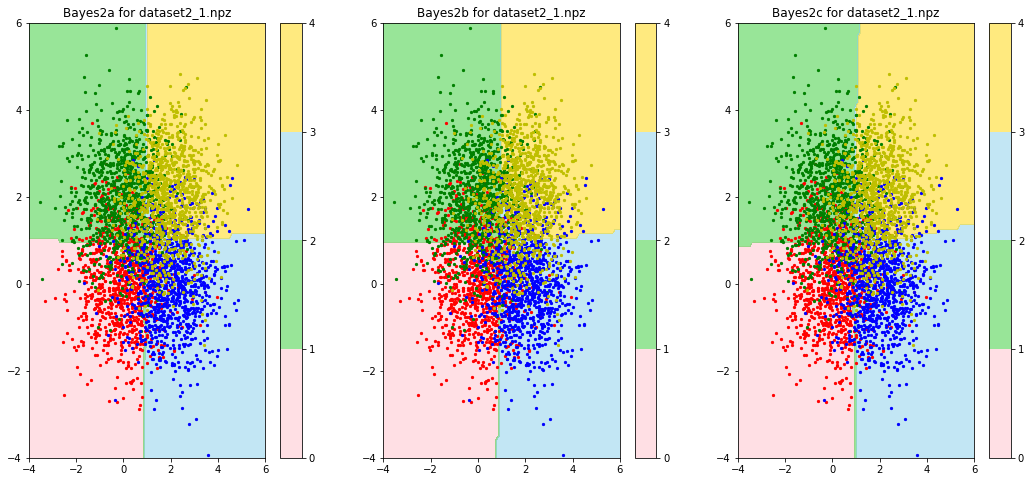

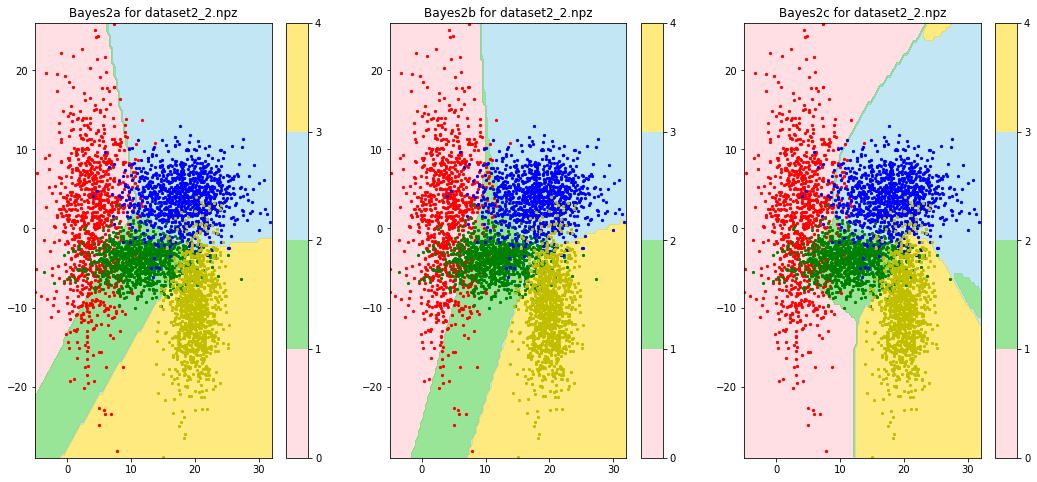

In [11]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

for ds in ['dataset2_1.npz', 'dataset2_2.npz']:
    # Load data
    d_s_2 = np.load(ds)
    X_train, Y_train, X_test, Y_test = d_s_2['arr_0'], d_s_2['arr_1'], d_s_2['arr_2'], d_s_2['arr_3']

    # Split X_train into separate arrays based on Y_train values
    X_train_arr = [np.array([X_train[i] for i in range(len(Y_train)) if Y_train[i] == j]) for j in range(1, 5)]

    X_test_1, X_test_2 = np.meshgrid(np.linspace(np.floor(np.min(X_train[:,0])), np.ceil(np.max(X_train[:,0])), 100), np.linspace(np.floor(np.min(X_train[:,1])), np.ceil(np.max(X_train[:,1])), 100))


    # Set up plot
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))

    for i, bayes in enumerate([Bayes2a, Bayes2b, Bayes2c], start=1):
        # Calculate predictions
        Y_test_all = np.zeros_like(X_test_1)
        for j in range(Y_test_all.shape[0]):
            X_test_all = np.concatenate((X_test_1[j, :], X_test_2[j, :]))
            X_test_all = X_test_all.reshape(2, Y_test_all.shape[0])
            X_test_all = np.transpose(X_test_all)
            Y_test_all[j, :] = bayes(X_train, Y_train, X_test_all)

        # Plot contours
        d = axs[i - 1].contourf(X_test_1, X_test_2, Y_test_all, levels=np.arange(0, 5), colors=('pink', 'limegreen', 'skyblue', 'gold'), alpha=0.5)
        axs[i - 1].set_title('Bayes2{} for {}'.format(chr(ord('a') + i - 1), ds))

        # Scatter plot for each class
        for j, X_train_j in enumerate(X_train_arr):
            axs[i - 1].scatter(X_train_j[:, 0], X_train_j[:, 1], color=['r', 'g', 'b', 'y'][j], s=5)

        # Add colorbar
        fig.colorbar(d, ax=axs[i - 1])

    # Show plot
    plt.show()





** Cell type : TextWrite **
(Write your observations and table of errors here)
# Observations:
    1) Bayes2c is the best classifier
    2) Bayes2a works for normal datasets with a known variance while Bayes2b works datasets with unkown variance
    3) Dataset_2_2  requires a more quadratic boundary layer than Dataset_2_1
    
# Loss Table:

| Expected Loss | Bayes2a | Bayes2b | Bayes2c |
|---------------|:-------:|--------:|---------|
| Data Set_2_1    |  0.44 |  0.43  | 0.42  |
| Data Set_2_2    |  0.18 |  0.19  | 0.14  |

# Confusion Matrices:

##### Bayes2a for Dataset_2_1
| Actual/Predicted|      1      |      2      |      3      |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     625     |     222     |     143     |      10     |
|        2        |      92     |     741     |      64     |     103     |
|        3        |      90     |      45     |     770     |      95     |
|        4        |      21     |     130     |     194     |     655     |     

   ##### Bayes2b for Dataset_2_1
| Actual/Predicted|       1     |      2      |      3      |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     633     |     218     |     137     |      12     |
|        2        |      95     |     743     |      60     |     102     |
|        3        |      84     |      49     |     773     |      94     |
|        4        |      16     |     137     |     196     |     651     |

   ##### Bayes2c for Dataset_2_1
| Actual/Predicted|      1      |      2      |      3      |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     634     |     217     |     138     |      11     |
|        2        |      99     |     742     |      61     |      98     |
|        3        |      87     |      47     |     772     |      94     |
|        4        |      15     |     134     |     201     |     650     |
   
   ##### Bayes2a for Dataset_2_2
| Actual/Predicted|      1      |      2      |       3     |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     830     |     150     |      18     |      2      |
|        2        |      93     |     784     |      46     |      77     |
|        3        |      30     |      61     |     905     |      4      |
|        4        |      0      |      23     |      78     |     899     |

   ##### Bayes2b for Dataset_2_2
| Actual/Predicted|     1       |      2      |      3      |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     891     |     106     |      3      |      0      |
|        2        |     119     |     691     |     124     |      66     |
|        3        |      23     |     106     |     864     |      7      |
|        4        |      0      |      5      |     102     |     893     |

   ##### Bayes2c for Dataset_2_2
| Actual/Predicted|       1    |      2      |       3     |      4      |
|-----------------|:-----------:|------------:|-------------|-------------|
|        1        |     901     |      80     |      19     |      0      |
|        2        |      64     |     824     |      46     |      66     |
|        3        |      19     |      31     |     936     |      14     |
|        4        |      0      |      36     |      48     |     916     |

In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




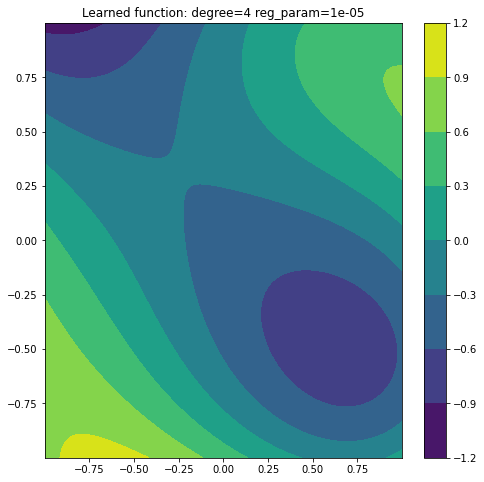

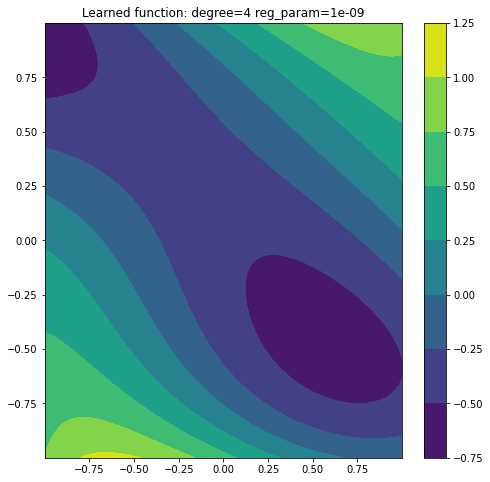

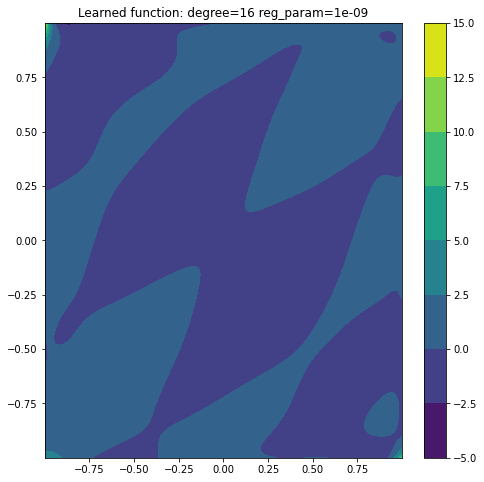

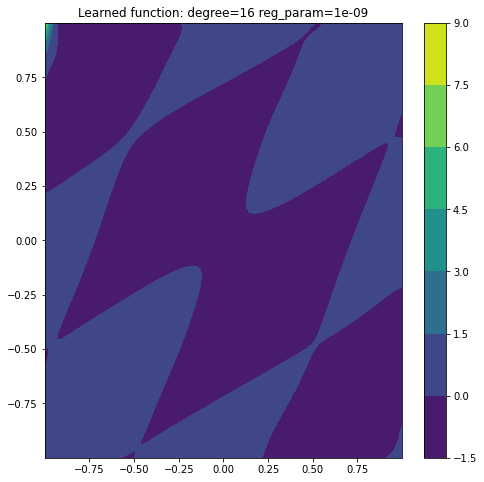

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def poly_reg_predict(X_test, weights, degree=1):
    m = X_test.shape[0]
    x1 = X_test[:, 0]
    x2 = X_test[:, 1]
    features = np.ones((m, 1))
    
    for k in range(1, degree + 1):
        for j in range(0, k + 1):
            feature = np.multiply(x1[:, None]**(k - j), x2[:, None]**j)
            features = np.concatenate((features, feature), axis=1)
    
    y_test_pred = np.dot(features, weights)
    return y_test_pred

def poly_reg_train(X_train, Y_train, degree=1, reg_param=0.01):
    m = X_train.shape[0]
    lambda_val = reg_param
    
    x1 = X_train[:, 0]
    x2 = X_train[:, 1]
    phi = np.ones((m, 1))
    
    for k in range(1, degree + 1):
        for j in range(0, k + 1):
            feature = np.multiply(x1[:, None]**(k - j), x2[:, None]**j)
            phi = np.concatenate((phi, feature), axis=1)
    
    term1 = np.dot(np.transpose(phi), phi) + m * lambda_val / 2 * np.identity(phi.shape[1])
    term2 = np.dot(np.transpose(phi), Y_train)
    weights = np.dot(np.linalg.inv(term1), term2)
    
    return weights

def visualize_poly_2d(X_test, Y_test, weights, degree, title=""):
    max_val = np.max(X_test)
    min_val = np.min(X_test)
    X, Y = np.meshgrid(np.linspace(min_val, max_val, 100), np.linspace(min_val, max_val, 100))
    Z = np.zeros(X.shape)
    
    for i in range(X.shape[0]):
        X_grid = np.concatenate((X[i], Y[i]), axis=0)
        X_grid = X_grid.reshape(2, 100)
        X_grid = np.transpose(X_grid)
        Z[i] = poly_reg_predict(X_grid, weights, degree)
        
    plt.contourf(X, Y, Z)
    plt.title('Learned function: degree=' + str(degree) + title)
    plt.colorbar()

# Loading the data
data_set = np.load('dataset3_1.npz')
X_train = data_set['arr_0']
Y_train = data_set['arr_1']
X_test = data_set['arr_2']
Y_test = data_set['arr_3']

degrees = [1, 2, 4, 8, 16]
lambda_vals = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

for sample_size in [50, 100, 200, 1000]:
    X_tr = X_train[0:sample_size, :]
    Y_tr = Y_train[0:sample_size]

    best_degree = degrees[0]
    best_lambda = lambda_vals[0]
    min_sq_error = float('inf')

    for degree in degrees:  
        for lambda_val in lambda_vals:
            weights = poly_reg_train(X_tr, Y_tr, degree, lambda_val)
            Y_pred = poly_reg_predict(X_test, weights, degree)
            square_error = np.sum((Y_test - Y_pred) ** 2)
            #print(square_error**0.5) 
            if square_error < min_sq_error:
                best_degree = degree
                best_lambda = lambda_val
                min_sq_error = square_error

    plt.figure(figsize=(8, 8))
    best_weights = poly_reg_train(X_tr, Y_tr, best_degree, best_lambda)
    visualize_poly_2d(X_test, Y_test, best_weights, best_degree, " reg_param=" + str(best_lambda))

plt.show()


** Cell type : TextWrite **

# Observations

1) When dealing with large training datasets, opting for a lower degree polynomial to fit the data may lead to underfitting.

2) Conversely, with smaller training datasets, using a higher degree polynomial to fit the data can result in overfitting.

3) Increasing the regularization parameter tends to increase the mse for large data sets and decreases mse for small datasets.

4) Train error increases with increase in regularization while decreasing with increase in degree.


# Error Tables

## for degree = 1 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.25038 | 0.30126 |
| 100  | 0.258091013339 | 0.273148637805 |
| 200  | 0.2465350744 | 0.267663050  |
| 1000 | 0.2407282185 | 0.2625346503 |

## for degree = 1 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.25038 | 0.30126 |
| 100  | 0.25809101333 | 0.2731486377 |
| 200  | 0.246535074478 | 0.2676630503 |
| 1000 | 0.240728218518 | 0.262534650306 |

## for degree = 1 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.2503| 0.30126 |
| 100  | 0.2580910133 | 0.2731486345 |
| 200  |0.246535074478 | 0.26766304945 |
| 1000 | 0.2407282185  | 0.26253465030 |

## for degree = 1 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.25038 |0.30126 |
| 100  | 0.25809101334 | 0.2731483084 |
| 200  | 0.246535074 | 0.2676629634 |
| 1000 | 0.240728218 | 0.2625346500 |

## for degree = 1 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.25038  | 0.30105 |
| 100  | 0.2580910395 | 0.273115768 |
| 200  | 0.2465350778 | 0.26765437177 |
| 1000 | 0.2407282185 | 0.2625346239 |

## for degree = 1 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.252402 | 0.28616 |
| 100  | 0.258294466 | 0.270453406 |
| 200  | 0.24656485220  | 0.259217550994 |
| 1000 | 0.240728346 | 0.2625322491 |

## for degree = 2 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1341 | 0.15789 |
| 100  | 0.13095062750 | 0.153209931 |
| 200  | 0.133665325 | 0.1457806507 |
| 1000 | 0.138824102 | 0.1424293186 |

## for degree = 2 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1341| 0.157899 |
| 100  | 0.1309506275 | 0.1532099310 |
| 200  | 0.133665325 | 0.14578065075 |
| 1000 | 0.1388241025 | 0.14242931864 |

## for degree = 2 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1341 | 0.15789 |
| 100  | 0.130950627 | 0.153209915  |
| 200  |0.13366532560 | 0.14578064927 |
| 1000 | 0.13882410254 | 0.142429319270 |

## for degree = 2 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1341 | 0.15789 |
| 100  | 0.134835269243 | 0.143681571865 |
| 200  | 0.1336653256 | 0.14578050132 |
| 1000 | 0.13882410254 | 0.1424293819 |

## for degree = 2 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.134137 | 0.157268 |
| 100  | 0.130950627 | 0.153208355 |
| 200  | 0.13366616394| 0.145766637260  |
| 1000 | 0.138824129  | 0.142435671 |

## for degree = 2 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.17322  | 0.187107 |
| 100  | 0.146629372 | 0.1605939564 |
| 200  | 0.138800591 | 0.1501065680 |
| 1000 | 0.1390708213  | 0.1432909618  |

## for degree = 4 and $\lambda = 1e-9 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.102018 | 0.1573339 |
| 100  |0.113026637   | 0.14277575185 |
| 200  | 0.102510629 | 0.133007636 |
| 1000 | 0.12501724| 0.127079628 |

## for degree = 4 and $\lambda = 1e-7 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.102018 | 0.1573339 |
| 100  | 0.1130266378 | 0.1427757534 |
| 200  | 0.10251062  | 0.133007376 |
| 1000 | 0.1250172421 | 0.12707962844 |

## for degree = 4 and $\lambda = 1e-5 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1020183 | 0.157333 |
| 100  | 0.11302663784 | 0.14277591096 |
| 200  | 0.1025106   | 0.132981448 |
| 1000 | 0.1250172421  | 0.12707963627  |

## for degree = 4 and $\lambda = 1e-3 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1020186| 0.1572857 |
| 100  |0.11302666589 | 0.14279167989 |
| 200  | 0.102820234 | 0.131012495 |
| 1000 | 0.12501724237 | 0.12708041992 |

## for degree = 4 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1029723 | 0.15978057 |
| 100  | 0.1132304970 | 0.1444321089|
| 200  | 0.13434259 | 0.135740902 |
| 1000 | 0.12501925 | 0.127159849 |

## for degree = 4 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1562857659 | 0.178096031 |
| 100  |0.1374964510 | 0.16064542365 |
| 200  | 0.261932860 | 0.2519236336 |
| 1000 | 0.130005162 | 0.1356799573 |

## for degree = 8 and $\lambda = 1e-9 $

| size | train error       | test error      |
|------|-------------------|-----------------|
| 50   | 0.000132724 | 238.1847366   |
| 100  |0.041587926   | 0.7129244325  |
| 200  | 0.0212313225496   | 0.0605523574213 |
| 1000 | 0.0279090374639   | 0.0389695560105 |

## for degree = 8 and $\lambda = 1e-7 $

| size | train error      | test error      |
|------|------------------|-----------------|
| 50   | 0.000153706876 | 198.67544462    |
| 100  | 0.04158792919  | 0.71212518684  |
| 200  | 0.0212401360527  | 0.0592586822811 |
| 1000 | 0.0279133443742  | 0.0387100627314 |

## for degree = 8 and $\lambda = 1e-5 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.006371692 | 32.64330698    |
| 100  | 0.041613157 | 0.64016186633   |
| 200  | 0.0344044249716 | 0.0488611890907 |
| 1000 | 0.0381095318193 | 0.0425359712145 |

## for degree = 8 and $\lambda = 1e-3 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.037641238 | 1.182796474  |
| 100  | 0.05313783820 |0.18332947876  |
| 200  | 0.0886708255381 | 0.106602766092  |
| 1000 | 0.091372191288  | 0.0986931194958 |

## for degree = 8 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.07257075 | 0.186443327 |
| 100  | 0.0879019194 | 0.175499679 |
| 200  | 0.12726359771  | 0.136115290828 |
| 1000 | 0.125640721256 | 0.13583691973  |

## for degree = 8 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1391915060 | 0.1793010239 |
| 100  | 0.130754699  | 0.1656303760 |
| 200  | 0.257783572702 | 0.248473983794 |
| 1000 | 0.23800620875  | 0.249196108543 |

## for degree = 16 and $\lambda = 1e-9 $

| size | train error       | test error        |
|------|-------------------|-------------------|
| 50   | 5.381508288077805e-09 |247.66040715452974 |
| 100  | 2.998062588091731e-06 | 73.8693730380     |
| 200  | 0.000106644835044 | 0.0962108609965   |
| 1000 | 0.000198795222871 | 0.000858701772553 |

## for degree = 16 and $\lambda = 1e-7 $

| size | train error      | test error       |
|------|------------------|------------------|
| 50   | 3.8323483243538e-06 | 259.25866902  |
| 100  |0.00027308068 | 20.428478028     |
| 200  | 0.00256232645339 | 0.235172097369   |
| 1000 | 0.00334569829624 | 0.00552183688108 |

## for degree = 16 and $\lambda = 1e-5 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.0006445687314 | 82.79094445299108|
| 100  | 0.0053175930  | 26.882456965  |
| 200  | 0.0258796559515 | 0.101756842194  |
| 1000 | 0.0270446752832 | 0.0317857267821 |

## for degree = 16 and $\lambda = 1e-3 $

| size | train error     | test error      |
|------|-----------------|-----------------|
| 50   | 0.0261165728796   | 4.6885875268  |
| 100  | 0.03501179941720 | 0.9249697454  |
| 200  | 0.0713290753256 | 0.0909543975119 |
| 1000 | 0.0772489935861 | 0.0844301722309 |

## for degree = 16 and $\lambda = 1e-1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.062163919003 | 0.27702693339 |
| 100  |0.07689141733 | 0.2070464334 |
| 200  | 0.0249780830 | 0.0385098448 |
| 1000 | 0.078540495075 | 0.08436715186 |

## for degree = 16 and $\lambda = 1e1 $

| size | train error    | test error     |
|------|----------------|----------------|
| 50   | 0.1282145207155 | 0.183897040708 |
| 100  | 0.1248275339 | 0.1685248987 |
| 200  | 0.125450638 | 0.144589706 |
| 1000 | 0.11478331977 | 0.11989665157 |

**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











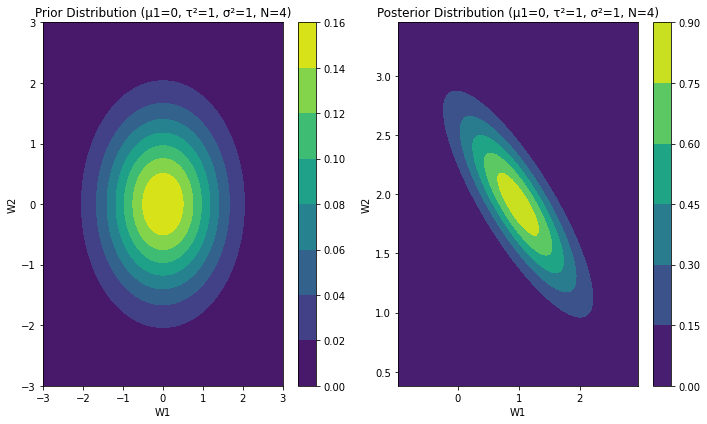

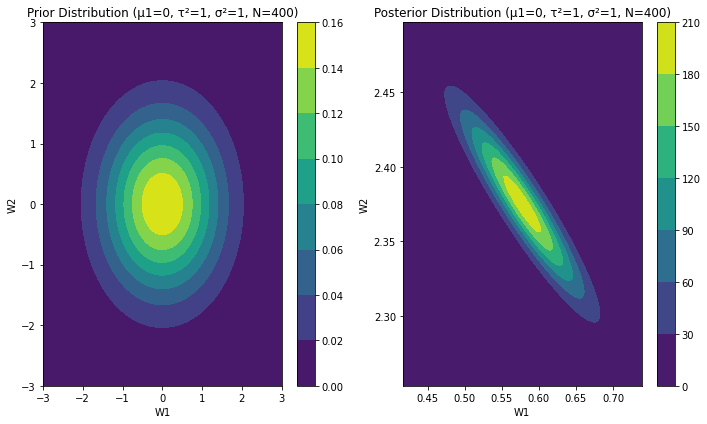

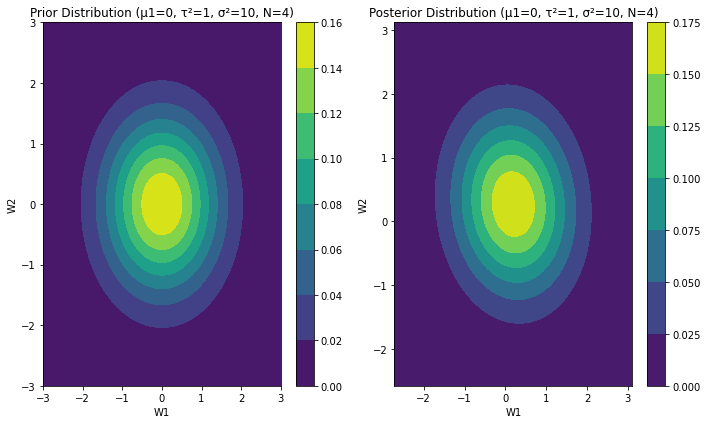

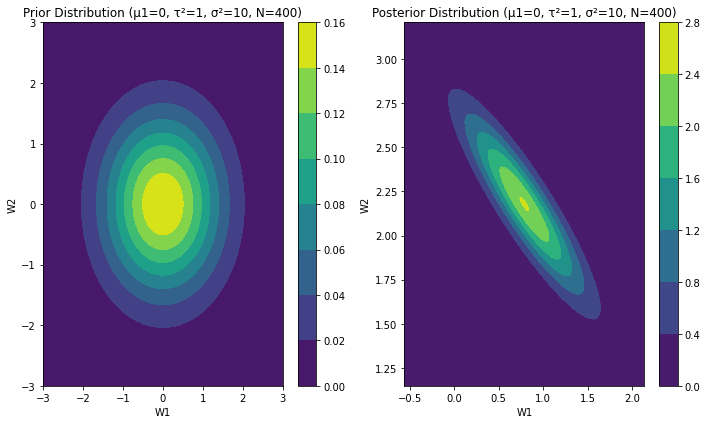

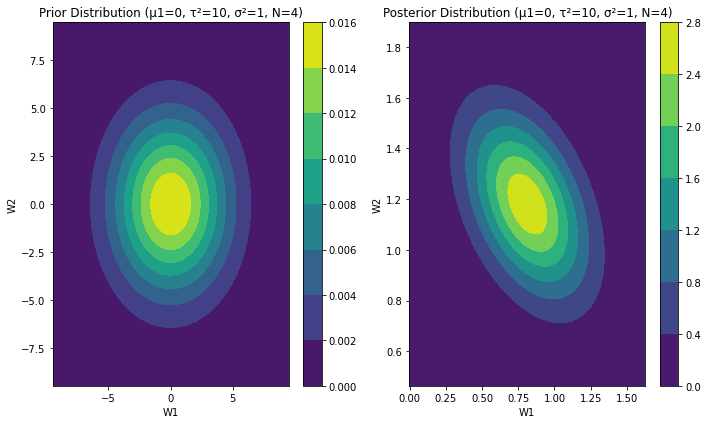

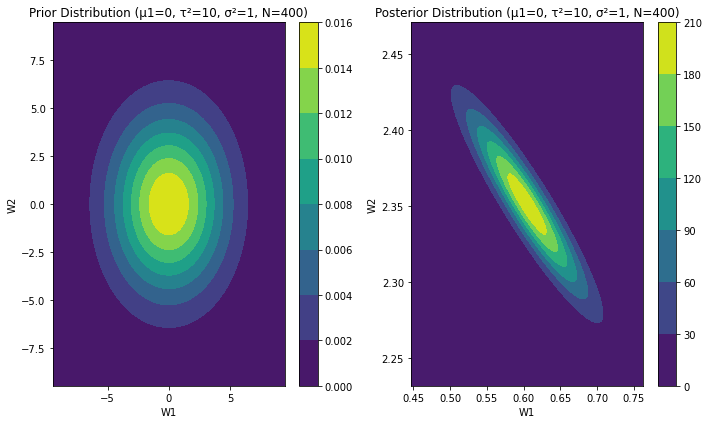

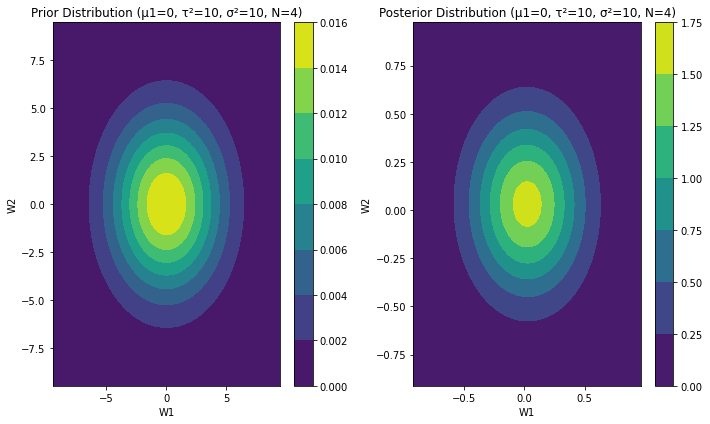

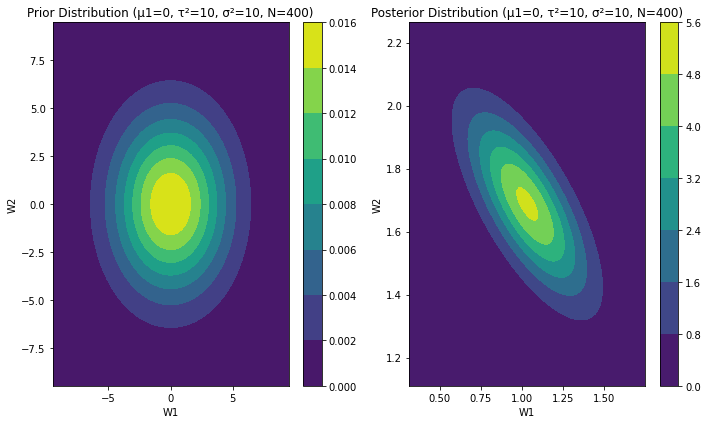

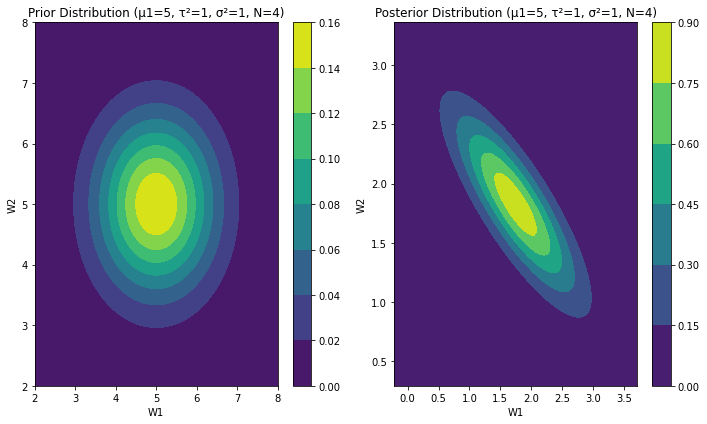

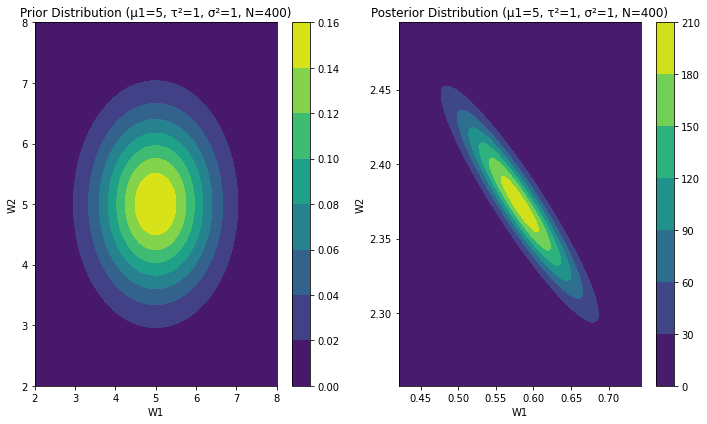

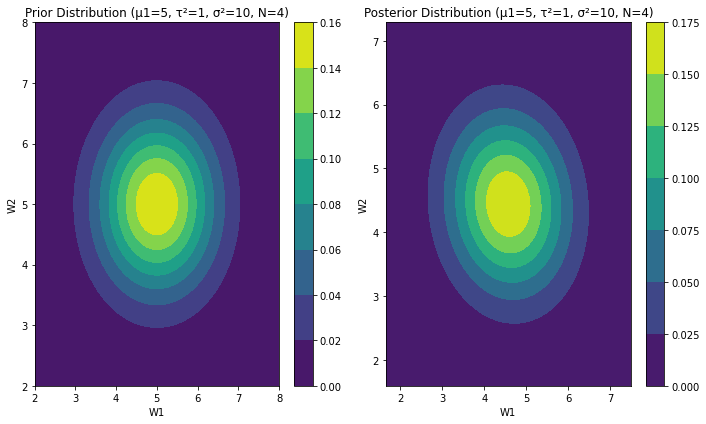

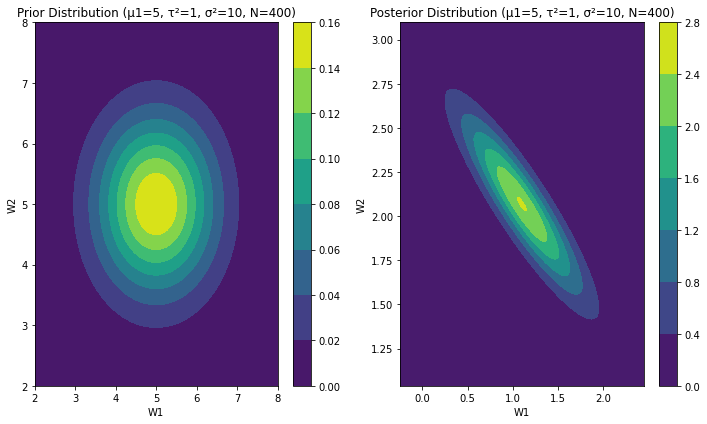

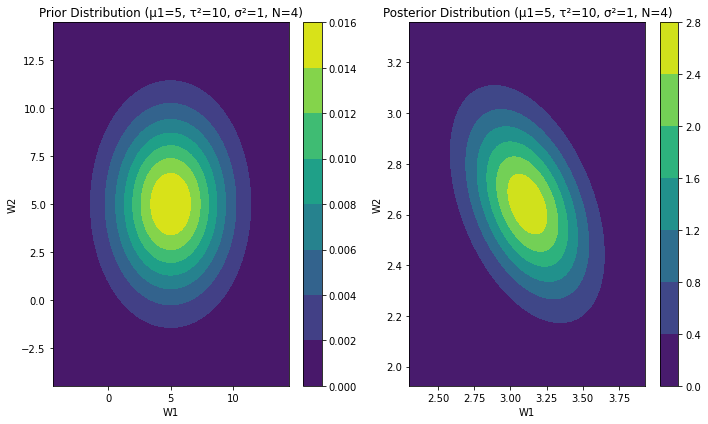

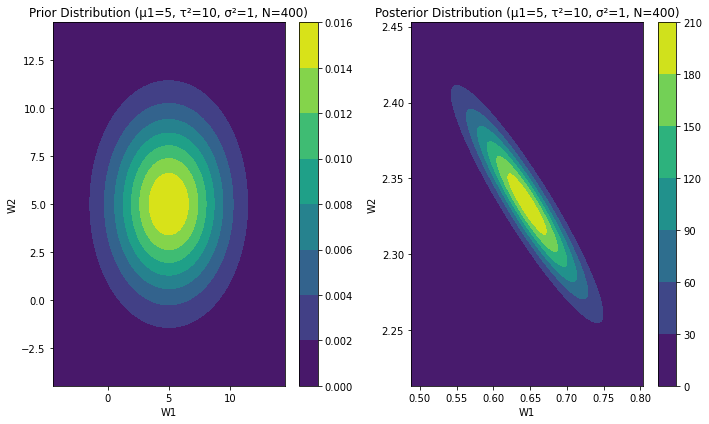

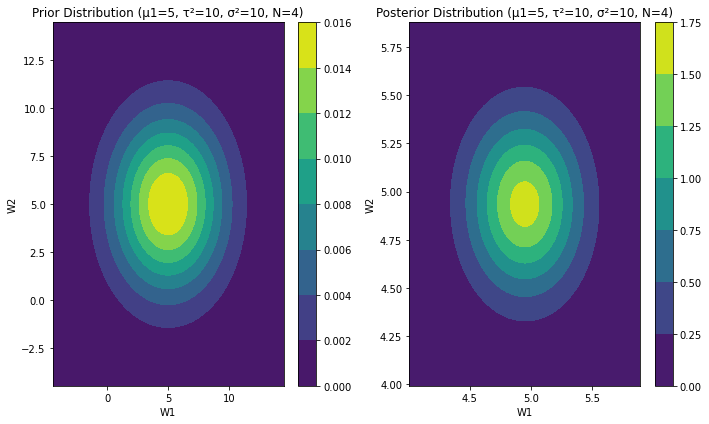

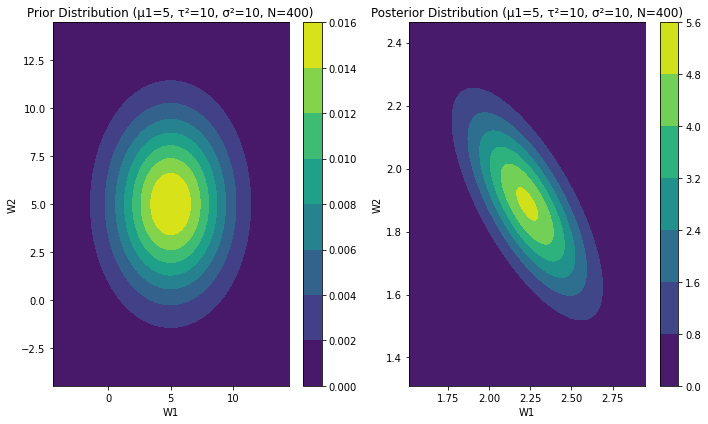

In [13]:
# Cell type : CodeWrite
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
X = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y = np.array([5.1, 6.1, 4.2, 2.9])

# Define parameters
num_data_points = [4, 400]
mu_values = [0, 5]
tau_square_values = [1, 10]
sigma_square_values = [1, 10]

# Function to compute multivariate normal PDF
def gaussian(x, mean, cov):
    d = len(mean)
    coeff = 1 / ((2 * np.pi) ** (d / 2) * np.linalg.det(cov) ** 0.5)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean))
    return coeff * np.exp(exponent)

# Repeat experiments for different parameters
for mu1 in mu_values:
    for tau_square in tau_square_values:
        for sigma_square in sigma_square_values:
            for num_points in num_data_points:
                # Generate repeated data points
                if(num_points == 400):
                  X_repeated = np.repeat(X, num_points, axis=0)
                  Y_repeated = np.repeat(Y, num_points)
                else:
                  X_repeated = X
                  Y_repeated = Y

                # Compute the mean and covariance matrix of the prior distribution
                prior_mean = np.array([mu1, mu1])
                prior_covariance = tau_square * np.eye(2)

                # Compute the mean and covariance matrix of the posterior distribution
                posterior_precision = np.linalg.inv(prior_covariance + (sigma_square ** -2) * np.dot(X_repeated.T, X_repeated))
                posterior_mean = np.dot(posterior_precision, np.dot(prior_covariance, prior_mean) + (sigma_square ** -2) * np.dot(X_repeated.T, Y_repeated))
                posterior_covariance = posterior_precision
                #prior range
                x1_range_prior = np.linspace(prior_mean[0] - 3 * np.sqrt(prior_covariance[0, 0]), prior_mean[0] + 3 * np.sqrt(prior_covariance[0, 0]), 100)
                x2_range_prior = np.linspace(prior_mean[1] - 3 * np.sqrt(prior_covariance[1, 1]), prior_mean[1] + 3 * np.sqrt(prior_covariance[1, 1]), 100)
                x1_grid_prior, x2_grid_prior = np.meshgrid(x1_range_prior, x2_range_prior)
                # Define a grid for plotting with wider range
                x1_range = np.linspace(posterior_mean[0] - 3 * np.sqrt(posterior_covariance[0, 0]), posterior_mean[0] + 3 * np.sqrt(posterior_covariance[0, 0]), 100)
                x2_range = np.linspace(posterior_mean[1] - 3 * np.sqrt(posterior_covariance[1, 1]), posterior_mean[1] + 3 * np.sqrt(posterior_covariance[1, 1]), 100)
                x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
                pos = np.dstack((x1_grid, x2_grid))

                # Compute the prior and posterior distributions
                prior_distribution = np.zeros_like(x1_grid_prior)
                posterior_distribution = np.zeros_like(x1_grid)
                for i in range(len(x1_range)):
                    for j in range(len(x2_range)):
                        prior_distribution[i, j] = gaussian(np.array([x1_grid_prior[i, j], x2_grid_prior[i, j]]), prior_mean, prior_covariance)
                        posterior_distribution[i, j] = gaussian(np.array([x1_grid[i, j], x2_grid[i, j]]), posterior_mean, posterior_covariance)

                # Plot the contour maps
                plt.figure(figsize=(10, 6))
                plt.subplot(1, 2, 1)
                plt.contourf(x1_grid_prior, x2_grid_prior, prior_distribution, cmap='viridis')
                plt.title(f'Prior Distribution (μ1={mu1}, τ²={tau_square}, σ²={sigma_square}, N={num_points})')
                plt.xlabel('W1')
                plt.ylabel('W2')
                plt.colorbar()

                plt.subplot(1, 2, 2)
                plt.contourf(x1_grid, x2_grid, posterior_distribution, cmap='viridis')
                plt.title(f'Posterior Distribution (μ1={mu1}, τ²={tau_square}, σ²={sigma_square}, N={num_points})')
                plt.xlabel('W1')
                plt.ylabel('W2')
                plt.colorbar()

                plt.tight_layout()
                plt.show()


** Cell type : TextWrite **
# Observations:
1) Number of data-points:
    As number of points increases the posterior distribution shrinks. This is expected sice we have more information about the dataset with more number of points. The prediction improves.
    
2) Tau is increased:
    As Tau increases the posterior distribution broadens. Because a higher Tau means high variance in prior distribution, naturally the posterior distribution is spread out.
    
3) Sigma is increased
    As sigma increases the posterior distribution widens. Increasing standard deviation of the likelihood function results in an increased posterior distribution.

**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (/content/Data/dataset_A and /content/Data/dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [14]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def sigmoid(x):
    return 1/(1+np.exp(-x))

def Kernel(X1, X2, kernel, kernel_param):
    A=np.matmul(X1, X2.T)
    if(kernel=='linear'):
        return A
    elif(kernel=='poly'):
        return np.power(1+A, kernel_param)
    elif(kernel=='rbf'):
        B=np.sum(np.power(X1,2), axis=1)
        C=np.sum(np.power(X2,2), axis=1)
        return np.exp(kernel_param*((2*A-C).T-B).T)

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):
    r"""
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly'
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    Primal problem:
    $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    the dual of which is

    $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    where $\phi$ is the feature got by the kernel.

    Where K is the nxn kernel matrix computed on the training data.

    The kernel is defined by the kernel_param:
    If kernel=linear: K(\u,\v) = \u^\top \v
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)

    """

    n = X.shape[0]
    #normalizing
    X_normal = X - np.average(X, axis = 0)
    #kernel
    k = Kernel(X_normal,X_normal,kernel,kernel_param)
    alpha = np.zeros((n,))
    rt = 5
    grad_0 = -np.multiply(Kernel(X_normal, X_normal, kernel, kernel_param), Y)
    prev = float('inf')
    x_1 = np.zeros((n,))
    reg = np.zeros((n,))

    for _ in range(num_iter_gd):
        grad = np.multiply(grad_0, sigmoid(x_1))
        total_grad = np.linalg.norm((np.sum(grad, axis=1) / n) + reg)

        temp = alpha
        alpha -= rt * total_grad
        reg = reg_param * np.matmul(k, alpha)
        x_1 = np.matmul(k, alpha) * -Y

        risk = np.sum(np.log(1 + np.exp(x_1))) + np.dot(alpha.T, reg / 2)

        if(risk < prev):
            rt = max(1, (1.1 * rt))
        else:
            rt /= 2
            alpha = temp
            alpha -= rt * total_grad
            reg = reg_param * np.matmul(k, alpha)
            arg = np.matmul(k, alpha) * -Y
            risk = np.sum(np.log(1 + np.exp(arg))) + np.dot(alpha.T, reg / 2)
        prev = risk

    return alpha



def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    mean = np.average(train_X, axis = 0)
    train_X_normal = train_X - mean
    test_X_normal = test_X - mean
    n = train_X.shape[0]
    k = Kernel(train_X_normal, test_X_normal, kernel, kernel_param)
    Y = np.matmul(alpha.T, k)
    Y = np.sign(Y)
    return Y


def getError(Y_pred, Y_test):
    return float(np.sum(Y_test!=Y_pred)/len(Y_test))

def choose_hyperparam(X_train, Y_train, X_test, Y_test, kernel_type):
    regularizations = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    kernel_param = [1, 2, 3, 4, 5, 10] if kernel_type=='poly' else [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100]
    curr_param = (0,1)
    curr_err = 1
    if kernel_type == "rbf" or kernel_type == "poly":
        for reg in regularizations:
            for kp in kernel_param:
                a = train_pred_logistic_regression(X_train, Y_train, kernel = kernel_type, kernel_param = kp, reg_param = reg)
                Y_pred = test_pred(a, X_train,Y_train, X_test, kernel = kernel_type, kernel_param = kp)
                test_err = getError(Y_pred, Y_test)
                #print(kernel_type, reg, kp, test_err, sep = " ")
                if test_err < curr_err:
                    curr_err = test_err
                    curr_param = (reg, kp)
        return curr_param

    elif kernel_type == "linear":
        for reg in regularizations:
            a = train_pred_logistic_regression(X_train, Y_train, kernel = kernel_type, kernel_param = 1, reg_param = reg, num_iter_gd = 100)
            Y_pred = test_pred(a, X_train,Y_train, X_test, kernel = kernel_type, kernel_param = 1)
            test_err = getError(Y_pred, Y_test)
            #print(kernel_type, reg, test_err, sep = " ")
            if test_err < curr_err:
                curr_err = test_err
                curr_param = (reg, 1)
        return curr_param








In [17]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def sigmoid(x):
    return 1/(1 + np.exp(-x))


import numpy as np

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):
    X_centered = X - np.mean(X, axis=0)

    K = calc_Kernel(X_centered, X_centered, kernel, kernel_param)

    alpha = np.zeros(len(X))
    reg = reg_param * np.matmul(K, alpha)

    learning_rate = 5
    prev_risk = float('inf')

    for _ in range(num_iter_gd):
        arg = np.matmul(K, alpha) * Y * -1

        # gradient descent
        grad = -np.sum((np.exp(arg) / (1 + np.exp(arg))) * Y[:, np.newaxis] * K, axis=0) / len(X)
        grad += reg
        grad /= np.linalg.norm(grad)

        # Update after gradient descent
        alpha -= learning_rate * grad
        reg = reg_param * np.matmul(K, alpha)

        # Compute logistic loss
        risk = np.sum(np.log(1 + np.exp(arg))) + np.dot(alpha, reg) / 2

        if risk < prev_risk:
            learning_rate *= 1.1
        else:
            learning_rate /= 2
            alpha += learning_rate * grad  

        prev_risk = risk

    return alpha



def calc_Kernel(X,Y,kernel,kernel_param):
    A=np.matmul(X, Y.T)
    if(kernel=='linear'):
        return A
    elif(kernel=='poly'):
        return np.power(1+A, kernel_param)
    elif(kernel=='rbf'):
        B=np.sum(np.power(X,2), axis=1)
        C=np.sum(np.power(Y,2), axis=1)
        return np.exp(kernel_param*((2*A-C).T-B).T)


def test_pred(alpha, train_X,train_y, test_X, kernel = 'linear', kernel_param = 1):
    """
    Return the predictions on test_X using the learnt alphas
    """
    mean = np.average(train_X, axis = 0)
    train_X = train_X - mean
    test_X = test_X - mean
    n = train_X.shape[0]
    kernels = calc_Kernel(train_X, test_X, kernel, kernel_param)
    Y = np.matmul(alpha.T, kernels)
    Y = np.sign(Y)
    return Y


def getError(Y_pred, Y_test):
    return float(np.sum(Y_test!=Y_pred)/len(Y_test))

def choose_hyperparam(X_train, Y_train, X_test, Y_test, kernel_type):
    regularizations = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    kernel_param = [1, 2, 3, 4, 5, 10] if kernel_type=='poly' else [1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 100]
    curr_param = (0,1)
    curr_err = 1
    if kernel_type == "rbf" or kernel_type == "poly":
        for reg in regularizations:
            for kp in kernel_param:
                a = train_pred_logistic_regression(X_train, Y_train, kernel = kernel_type, kernel_param = kp, reg_param = reg)
                Y_pred = test_pred(a, X_train, Y_train, X_test,  kernel = kernel_type, kernel_param = kp)
                test_err = getError(Y_pred, Y_test)
                #print(kernel_type, reg, kp, test_err, sep = " ")
                if test_err < curr_err:
                    curr_err = test_err
                    curr_param = (reg, kp)
        return curr_param

    elif kernel_type == "linear":
        for reg in regularizations:
            a = train_pred_logistic_regression(X_train, Y_train, kernel = kernel_type, kernel_param = 1, reg_param = reg, num_iter_gd = 100)
            Y_pred = test_pred(a, X_train,Y_train, X_test, kernel = kernel_type, kernel_param = 1)
            test_err = getError(Y_pred, Y_test)
            #print(kernel_type, reg, test_err, sep = " ")
            if test_err < curr_err:
                curr_err = test_err
                curr_param = (reg, 1)
        return curr_param



In [44]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.
def split_data(X, Y, train_ratio=0.8):
    split_idx = int(train_ratio * len(X))
    X_train, X_valid = X[:split_idx], X[split_idx + 1:]
    Y_train, Y_valid = Y[:split_idx], Y[split_idx + 1:]
    return X_train, X_valid, Y_train, Y_valid

def validate_hyperparameters(data_name, kernel_type):
    data = np.load(data_name)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    X_tr, X_va, Y_tr, Y_va = split_data(X_train, Y_train)

    if kernel_type == "linear":
        reg_param, _ = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="linear")
        kernel_param = 1
    elif kernel_type == "rbf":
        reg_param, kernel_param = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="rbf")
    elif kernel_type == "poly":
        reg_param, kernel_param = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="poly")

    alpha = train_pred_logistic_regression(X_tr, Y_tr, kernel=kernel_type, reg_param=reg_param, kernel_param=kernel_param)
    Y_pred_test = test_pred(alpha, X_tr, Y_tr, X_test, kernel=kernel_type, kernel_param=kernel_param)
    Y_pred_train = test_pred(alpha, X_tr, Y_tr, X_train, kernel=kernel_type, kernel_param=kernel_param)

    return reg_param, kernel_param, getError(Y_pred_test, Y_test), getError(Y_pred_train, Y_train)

# Define dataset names
data_names = ["/content/Data/dataset_A.npz", "/content/Data/dataset_B.npz", "/content/Data/dataset_C.npz", "/content/Data/dataset_D.npz"]

# Define kernel types to evaluate
kernel_types = ["linear", "rbf", "poly"]

for data_name in data_names:
    print("Dataset:", data_name)
    for kernel_type in kernel_types:
        print("Kernel:", kernel_type.capitalize())
        reg_param, kernel_param, test_error, train_error = validate_hyperparameters(data_name, kernel_type)
        print(f"Regularization Parameter: {reg_param}")
        if kernel_type != "linear":
            print(f"Kernel Parameter: {kernel_param}")
        print(f"Test Error: {test_error}")
        print(f"Train Error: {train_error}")
        print()


Dataset: dataset_A.npz
Kernel: Linear
Regularization Parameter: 0.001
Test Error: 0.126
Train Error: 0.11466666666666667

Kernel: Rbf
Regularization Parameter: 0.0001
Kernel Parameter: 1
Test Error: 0.0
Train Error: 0.0013333333333333333

Kernel: Poly
Regularization Parameter: 0.001
Kernel Parameter: 10
Test Error: 0.002
Train Error: 0.0013333333333333333

Dataset: dataset_B.npz
Kernel: Linear
Regularization Parameter: 0.0001
Test Error: 0.2
Train Error: 0.17133333333333334

Kernel: Rbf
Regularization Parameter: 0.0001
Kernel Parameter: 0.1
Test Error: 0.202
Train Error: 0.17133333333333334

Kernel: Poly
Regularization Parameter: 0.1
Kernel Parameter: 2
Test Error: 0.208
Train Error: 0.17466666666666666

Dataset: dataset_C.npz
Kernel: Linear
Regularization Parameter: 10
Test Error: 0.14814814814814814
Train Error: 0.09266666666666666

Kernel: Rbf
Regularization Parameter: 0.0001
Kernel Parameter: 0.1
Test Error: 0.03367003367003367
Train Error: 0.0013333333333333333

Kernel: Poly
Regul

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

### Linear Kernel
|dataset\error   | training error  | test error |
|:----------------:|:-----------------:|:------------:|
|A | 0.126 | 0.114 |
|B | 0.2 | 0.1713 |
|C | 0.093 | 0.15 |
|D | 0.107 | 0.06 |


### RBF Kernel
|dataset\error   | training error  | test error |
|:----------------:|:-----------------:|:------------:|
|A | 0.0013 | 0.0 |
|B | 0.171 | 0.202 |
|C | 0.0013 | 0.0337 |
|D | 0.01 | 0.1124 |


### Polynomial Kernel
|dataset\error   | training error  | test error |
|:----------------:|:-----------------:|:------------:|
|A | 0.002 | 0.013 |
|B | 0.175 | 0.208 |
|C | 0.0134 | 0.0267 |
|D | 0.1075 | 0.06 |




## Hyper-parameters:

### regularisation Parameter
|dataset\type| linear | rbf | poly|
|:----------------:|:-----------------:|:------------:|:------------:|
|A |0.001 | 0.001 | 0.0001
|B |0.0001 |0.0001 |0.1
|C | 10 | 0.1| 1
|D |  0.0001|0.001 |0.0001

### Kernel Parameter

|dataset\type|  rbf | poly|
|:----------------:|:-----------------:|:------------:|
|A | 1 | 10 |
|B | 0.1 | 2 |
|C | 0.1 | 5 |
|D | 0.001 |1 |

# Observations:

    1) RBF kernel performs better in Datasets A,B and Poly kernel performs better in Datasets C,D
    2) Data-set A is not linearly seperable, therefore a large error is given for linear classifier.
    3) RBF performs bad in Data-set D, even worse than linear kernel, this is because the data is more linearly seperable.
    4) All kernels perform equally bad in Data-set B, we should look for other kernels for better classification. 


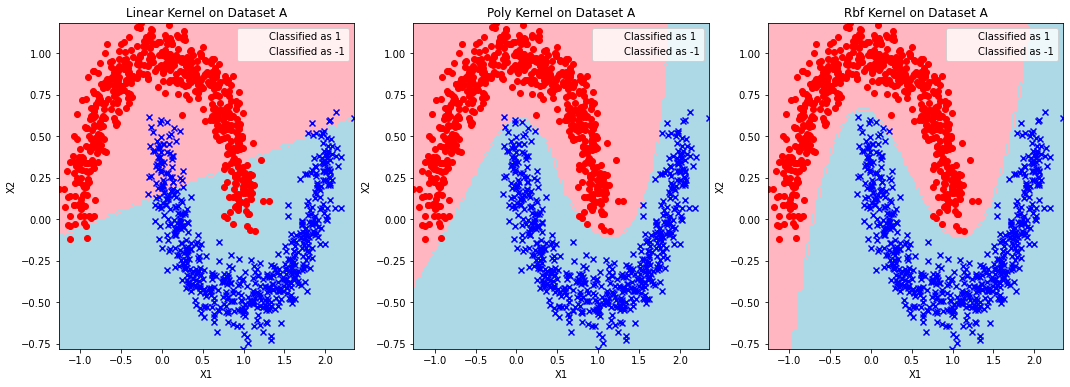

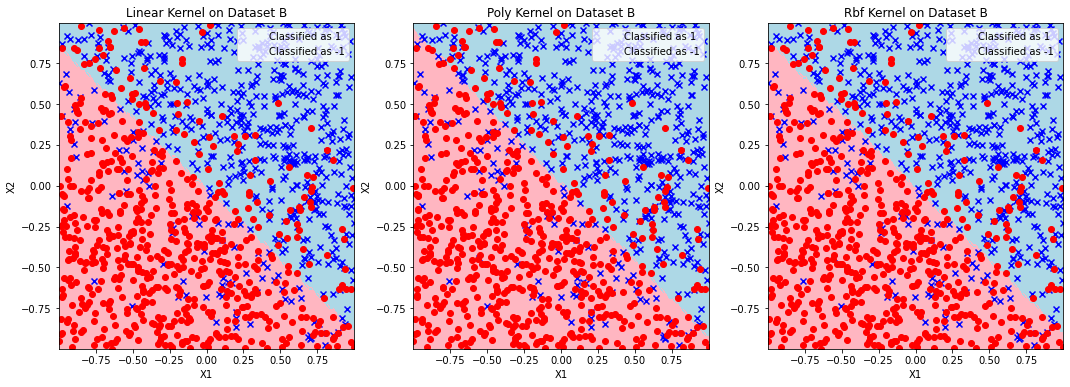

In [43]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on /content/Data/dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
data_names = ["/content/Data/dataset_A.npz","/content/Data/dataset_B.npz"]
labels = ["A","B"]
for ind, data_name in enumerate(data_names):
    label = labels[ind]
    data = np.load(data_name)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    # Split the training data into training and validation sets
    split_idx = int(0.8 * len(X_train))
    X_tr, X_va = X_train[:split_idx], X_train[split_idx + 1:]
    Y_tr, Y_va = Y_train[:split_idx], Y_train[split_idx + 1:]

    # Choose hyperparameters for different kernel types
    reg_params = {}
    reg_params["linear"], _ = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="linear")
    reg_params["poly"], degree_poly = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="poly")
    reg_params["rbf"], kp = choose_hyperparam(X_tr, Y_tr, X_va, Y_va, kernel_type="rbf")

    # Generate meshgrid for plotting decision boundary
    n1, n2 = 100, 100
    x1 = np.linspace(np.min(X_tr[:, 0]), np.max(X_tr[:, 0]), n1)
    x2 = np.linspace(np.min(X_tr[:, 1]), np.max(X_tr[:, 1]), n2)
    x1, x2 = np.meshgrid(x1, x2)
    x = np.c_[x1.ravel(), x2.ravel()]

    # Train and predict using logistic regression with different kernels
    classifiers = {}
    for kernel_type in ["linear", "poly", "rbf"]:
        alpha = train_pred_logistic_regression(X_tr, Y_tr, kernel_type, reg_params[kernel_type], degree_poly if kernel_type == "poly" else kp, num_iter_gd=100)
        y_pred = test_pred(alpha, X_tr, Y_tr, x, kernel_type, degree_poly if kernel_type == "poly" else kp)
        classifiers[kernel_type] = y_pred.reshape((n1, n2))

    # Plot learned classifiers for current dataset and kernel types
    plt.figure(figsize=(18, 6))
    for i, kernel_type in enumerate(["linear", "poly", "rbf"], start=1):
        plt.subplot(1, 3, i)
        plt.title(f"{kernel_type.capitalize()} Kernel on Dataset {label}")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.contourf(x1, x2, classifiers[kernel_type], colors=["lightpink", "lightblue"])
        plt.scatter(X_tr[Y_tr == 1][:, 0], X_tr[Y_tr == 1][:, 1], c="b", label="Y = 1", marker='x')
        plt.scatter(X_tr[Y_tr == -1][:, 0], X_tr[Y_tr == -1][:, 1], c="r", label="Y = -1", marker='o')
        plt.legend(["Classified as 1", "Classified as -1"], loc="upper right")

plt.show()


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [20]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)
def entropy_calc(p):
    if p==0 or p==1:
        return 0
    else:
        return (p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)))
def optimal_partition(X, Y, mode):
    n, d = X.shape
    best_attr = 1
    best_val = float('inf') if mode == 'entropy' else 0
    best_thresh = 0

    for attr in range(d):
        vals = X[:, attr]
        sorted_vals = np.sort(vals)
        sorted_indices = np.argsort(vals)
        sorted_labels = Y[sorted_indices]

        pos_count = np.sum(Y == 1)
        neg_count = len(Y) - pos_count

        pos_below = 0
        neg_below = 0

        for i in range(n - 1):
            if sorted_labels[i] == 1:
                pos_below += 1
            else:
                neg_below += 1

            if mode == 'accuracy':
                val1 = pos_below / n + (neg_count - neg_below) / n
                val2 = neg_below / n + (pos_count - pos_below) / n
            else:
                p_left = (i + 1) / n
                p_right = 1 - p_left
                val1 = p_left * entropy_calc(pos_below / (i + 1)) + p_right * entropy_calc((pos_count - pos_below) / (n - 1 - i))
                val2 = p_left * entropy_calc(neg_below / (i + 1)) + p_right * entropy_calc((neg_count - neg_below) / (n - 1 - i))

            val = max(val1, val2) if mode == 'accuracy' else min(val1, val2)

            if (mode == 'accuracy' and val > best_val) or (mode == 'entropy' and val < best_val):
                best_val = val
                best_attr = attr
                best_thresh = sorted_vals[i]
    return best_attr, best_thresh


def optimal_partition_accuracy(X, Y):
    return optimal_partition(X, Y, 'accuracy')

def optimal_partition_entropy(X, Y):
    return optimal_partition(X, Y, 'entropy')

def best_split(X, Y, mode):
    if mode == 'accuracy':
        return optimal_partition_accuracy(X, Y)
    else:
        return optimal_partition_entropy(X, Y)

class Node(object):
    def __init__(self, attr, thresh):
        self.left = None
        self.right = None
        self.attr = attr
        self.thresh = thresh
        self.classification = None
        self.leaf = False

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',last_pos=None, last_neg=None):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    pos = np.sum(Y == 1)
    neg = len(Y) - pos
    if pos == 0 or neg == 0 or pos + neg <= num_nodes_stop or (last_pos == pos and last_neg == neg) or pos / (pos + neg) >= 0.95 or neg / (pos + neg) >= 0.95:
        leaf_node = Node(None, None)
        leaf_node.leaf = True
        leaf_node.classification = 1 if pos > neg else -1
        return leaf_node
    else:
        best_attr, best_thresh = best_split(X, Y, criterion)
        tree_node = Node(best_attr, best_thresh)
        X_left = X[X[:, best_attr] <= best_thresh]
        X_right = X[X[:, best_attr] > best_thresh]
        Y_left = Y[X[:, best_attr] <= best_thresh]
        Y_right = Y[X[:, best_attr] > best_thresh]

        tree_node.left = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion, pos, neg)
        tree_node.right = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion, pos, neg)
        return tree_node


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    def recursive_eval(tree, x):
        if tree.leaf == True:
            return tree.classification
        elif x[tree.attr] <= tree.thresh:
            return recursive_eval(tree.left, x)
        else:
            return recursive_eval(tree.right, x)

    Y_test_pred = np.zeros(len(test_X))
    for ind in range(len(test_X)):
        Y_test_pred[ind] = recursive_eval(tree, test_X[ind])
    return Y_test_pred

def train_and_predict_dec_tree(X, Y, num_nodes_stop, criterion, X_test):
    tree=train_decision_tree(X,Y,num_nodes_stop, criterion)
    return eval_decision_tree(tree, X_test)


In [21]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.
def choose_best_hyper_param_dec_tree(X_tr, Y_tr, X_va, Y_va, node_size, crit):
    best_err=10
    best_num=-1
    for num in  node_size:
        tree=train_decision_tree(X_tr, Y_tr, num, crit)
        Y_pr=eval_decision_tree(tree, X_va)
        err=error(Y_pr, Y_va)
        if(err<best_err):
            best_num=num
            best_err=err
    return best_num, best_err

def tree_comp(X_tr, Y_tr, X_va, Y_va, node_size, crit, X_test):
    best_num, best_err=choose_best_hyper_param_dec_tree(X_tr, Y_tr, X_va, Y_va, node_size, crit)
    return train_and_predict_dec_tree(X_tr, Y_tr, best_num, criterion)

def error(Y_test, Y_pred):
    return np.sum(Y_test!=Y_pred)/len(Y_test)

data_names = ["/content/Data/dataset_A.npz","/content/Data/dataset_B.npz","/content/Data/dataset_C.npz","/content/Data/dataset_D.npz"]
label = ["A","B","C","D"]
for i in range(len(data_names)) :
    ch = label[i]
    data_name = data_names[i];
    data = np.load(data_name)
    #print(data['arr_1'])
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']

    #print(str(len(X_train)))
    X_tr=X_train[:int(0.8*(len(X_train)))]
    X_va=X_train[int(0.8*(len(X_train))):]
    Y_tr=Y_train[:int(0.8*(len(Y_train)))]
    Y_va=Y_train[int(0.8*(len(Y_train))):]
    node_size=[1,2,3,4,8,12,16,24,45,55,64]
    criterion=['accuracy', 'entropy']

    erro=[]
    for crit in criterion:
        best_num, best_err=choose_best_hyper_param_dec_tree(X_tr, Y_tr, X_va, Y_va, node_size, crit)
        print("For dataset "+ch+": ")
        print("For criterion "+crit)
        print("The best stopping size is "+str(best_num)+" and the least validation error is "+str(best_err))
        print("The training error is "+str(error(train_and_predict_dec_tree(X_tr, Y_tr, best_num, crit, X_tr), Y_tr)))
        print("The test error is "+str(error(train_and_predict_dec_tree(X_tr, Y_tr, best_num, crit, X_test), Y_test)))


For dataset A: 
For criterion accuracy
The best stopping size is 2 and the least validation error is 0.04
The training error is 0.02
The test error is 0.05
For dataset A: 
For criterion entropy
The best stopping size is 1 and the least validation error is 0.01
The training error is 0.009166666666666667
The test error is 0.016
For dataset B: 
For criterion accuracy
The best stopping size is 12 and the least validation error is 0.25333333333333335
The training error is 0.15666666666666668
The test error is 0.248
For dataset B: 
For criterion entropy
The best stopping size is 55 and the least validation error is 0.24666666666666667
The training error is 0.14666666666666667
The test error is 0.224
For dataset C: 
For criterion accuracy
The best stopping size is 45 and the least validation error is 0.1
The training error is 0.11083333333333334
The test error is 0.16161616161616163
For dataset C: 
For criterion entropy
The best stopping size is 4 and the least validation error is 0.083333333

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  

### Error Table
Node_size is the hyper-parameter

| Decision_Tree | Node_Size | Train-ZO | Test-ZO |
|---------------|:---------:|----------------|--------------:|
| Data-Set-A    |     1     | 0.0092         |      0.016    |
| Data-Set-B    |     55    | 0.1467          |    0.224     |
| Data-Set-C    |     4    |  0.02667         |    0.101     |
| Data-Set-D    |     1    |  0.0125          |     0.071    | 

# Observations:

    1) Entropy is the better criterion here for all the datasets
    2) Data-sets A and D required only decision stumps while Data-set B has a large node-size, could be because the dataset has high variancee.

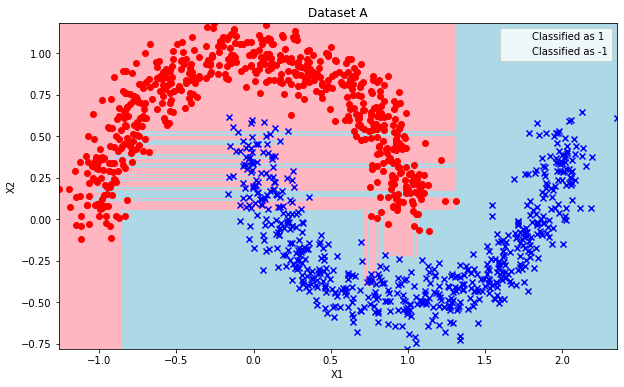

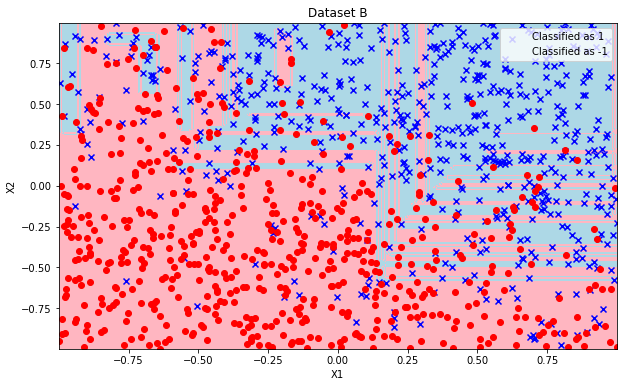

In [67]:
## Codewrite cell: Generate plots of learned decision tree classifier on /content/Data/dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2
num=[3,12]
data_names = ["/content/Data/dataset_A.npz","/content/Data/dataset_B.npz"]
label = ["A","B"]

def split_data(X, Y, train_ratio=0.8):
    split_idx = int(train_ratio * len(X))
    X_train, Y_train = X[:split_idx], Y[:split_idx]
    return X_train, Y_train

for ind in range(len(data_names)):
    ch = labels[ind]
    data_name = data_names[ind]
    data = np.load(data_name)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

    #Train split
    X_tr, Y_tr = split_data(X_train, Y_train)

    # Training
    tree = train_decision_tree(X_tr, Y_tr, num[ind], criterion='accuracy')

    n1, n2 = 100, 100
    x1 = np.linspace(np.min(X_tr[:, 0]), np.max(X_tr[:, 0]), n1)
    x2 = np.linspace(np.min(X_tr[:, 1]), np.max(X_tr[:, 1]), n2)
    x1_meshgrid, x2_meshgrid = np.meshgrid(x1, x2)
    x_meshgrid = np.c_[x1_meshgrid.ravel(), x2_meshgrid.ravel()]

    Y_meshgrid_pred = eval_decision_tree(tree, x_meshgrid)
    Y_meshgrid_pred = Y_meshgrid_pred.reshape((n1, n2))

    plt.figure(figsize=(10, 6))
    plt.title("Dataset " + ch)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(x1_meshgrid, x2_meshgrid, Y_meshgrid_pred, colors=["lightpink", "lightblue"])
    plt.scatter(X_tr[Y_tr == 1][:, 0], X_tr[Y_tr == 1][:, 1], c="b", label="Y = 1", marker='x')
    plt.scatter(X_tr[Y_tr == -1][:, 0], X_tr[Y_tr == -1][:, 1], c="r", label="Y = -1", marker='o')
    plt.legend(["Classified as 1", "Classified as -1"], loc="upper right")
    plt.show()

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [57]:
# CodeWrite cell
# Write Random Forest classifier.
def entropy_calc(p):
    if p==0 or p==1:
        return 0
    else:
        return (p*np.log2(1/p)+(1-p)*np.log2(1/(1-p)))
def optimal_partition(X, Y, mode,b):
    n, d = X.shape
    best_attr = 1
    best_val = float('inf') if mode == 'entropy' else 0
    best_thresh = 0
    #choosing random subset
    subs = np.random.choice(d,int(d*b),replace=False)
    subs = np.sort(subs)

    for attr in subs:
        vals = X[:, attr]
        sorted_vals = np.sort(vals)
        sorted_indices = np.argsort(vals)
        sorted_labels = Y[sorted_indices]

        pos_count = np.sum(Y == 1)
        neg_count = len(Y) - pos_count

        pos_below = 0
        neg_below = 0

        for i in range(n - 1):
            if sorted_labels[i] == 1:
                pos_below += 1
            else:
                neg_below += 1

            if mode == 'accuracy':
                val1 = pos_below / n + (neg_count - neg_below) / n
                val2 = neg_below / n + (pos_count - pos_below) / n
            else:
                p_left = (i + 1) / n
                p_right = 1 - p_left
                val1 = p_left * entropy_calc(pos_below / (i + 1)) + p_right * entropy_calc((pos_count - pos_below) / (n - 1 - i))
                val2 = p_left * entropy_calc(neg_below / (i + 1)) + p_right * entropy_calc((neg_count - neg_below) / (n - 1 - i))

            val = max(val1, val2) if mode == 'accuracy' else min(val1, val2)

            if (mode == 'accuracy' and val > best_val) or (mode == 'entropy' and val < best_val):
                best_val = val
                best_attr = attr
                best_thresh = sorted_vals[i]
    return best_attr, best_thresh


def optimal_partition_accuracy(X,Y,b):
    return optimal_partition(X, Y, 'accuracy',b)

def optimal_partition_entropy(X,Y,b):
    return optimal_partition(X, Y, 'entropy',b)

def best_split(X, Y, mode,b):
    if mode == 'accuracy':
        return optimal_partition_accuracy(X, Y,b)
    else:
        return optimal_partition_entropy(X, Y,b)

class Node(object):
    def __init__(self, attr, thresh):
        self.left = None
        self.right = None
        self.attr = attr
        self.thresh = thresh
        self.classification = None
        self.leaf = False
def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',last_pos=None, last_neg=None,b=0.5):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    pos = np.sum(Y == 1)
    neg = len(Y) - pos
    if pos == 0 or neg == 0 or pos + neg <= num_nodes_stop or (last_pos==pos and last_neg==neg):
        leaf_node = Node(None, None)
        leaf_node.leaf = True
        leaf_node.classification = 1 if pos > neg else -1
        return leaf_node
    else:
        best_attr, best_thresh = best_split(X, Y, criterion,b)
        tree_node = Node(best_attr, best_thresh)
        X_left = X[X[:, best_attr] <= best_thresh]
        X_right = X[X[:, best_attr] > best_thresh]
        Y_left = Y[X[:, best_attr] <= best_thresh]
        Y_right = Y[X[:, best_attr] > best_thresh]

        tree_node.left = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion, pos, neg,b)
        tree_node.right = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion, pos, neg,b)

        return tree_node


def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    def recursive_eval(tree, x):
        if tree.leaf == True:
            return tree.classification
        elif x[tree.attr] <= tree.thresh:
            return recursive_eval(tree.left, x)
        else:
            return recursive_eval(tree.right, x)

    Y_test_pred = np.zeros(len(test_X))
    for ind in range(len(test_X)):
        Y_test_pred[ind] = recursive_eval(tree, test_X[ind])
    return Y_test_pred

def train_random_forest(X, Y, num_trees=10,criterion='accuracy', num_nodes_stop=1,
                         a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    num_samples, num_features = X.shape
    random_forest = []

    for _ in range(num_trees):
        # Random sampling
        sample_indices = np.sort(np.random.choice(num_samples, int(num_samples * a), replace=False))
        X_subset = X[sample_indices]
        Y_subset = Y[sample_indices]

        # Training decision tree on sample
        tree = train_decision_tree(X_subset, Y_subset, num_nodes_stop, criterion)
        random_forest.append(tree)

    return random_forest


def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""
    sum_y = np.zeros(len(test_X))

    for tree in random_forest:
        y_pr = eval_decision_tree(tree, test_X)
        sum_y += y_pr
    test_y = np.sign(sum_y)
    test_y[np.where(test_y == 0)] = 1

    return test_y



In [63]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
def error(Y_test, Y_pred):
    return np.sum(Y_test!=Y_pred)/len(Y_test)

def choose_best_hyper_parameters_r(X_tr, Y_tr, X_va, Y_va, tree_size, crit):
    best_err=10
    best_num=-1
    best_for=[]
    for num in  tree_size:
        forest=train_random_forest(X_tr, Y_tr,num, crit)
        Y_pr=eval_random_forest(forest, X_va)
        err=np.sum(Y_va!=Y_pr)/len(Y_va)
        if(err<best_err):
            best_num=num
            best_err=err
            best_for=forest
    return best_num, best_err, forest

data_names = ["/content/Data/dataset_A.npz","/content/Data/dataset_B.npz","/content/Data/dataset_C.npz","/content/Data/dataset_D.npz"]
label = ["A","B","C","D"]
for i in range(len(data_names)) :
    ch = label[i]
    data_name = data_names[i];
    data = np.load(data_name)
    #print(data['arr_1'])
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test  = data['arr_2']
    Y_test  = data['arr_3']

    d=X_train.shape[1]

    s=56 if ch=='C' else 10
    temp=np.transpose(X_train.copy())
    temp=np.transpose(np.vstack((temp, Y_train.T)))
    np.random.seed(s)
    np.random.shuffle(temp)
    X_train=temp[:,0:d]
    Y_train=temp[:,d]


    X_tr=X_train[:int(0.8*(len(X_train)))]
    X_va=X_train[int(0.8*(len(X_train))):]
    Y_tr=Y_train[:int(0.8*(len(Y_train)))]
    Y_va=Y_train[int(0.8*(len(Y_train))):]



    n,d=X_tr.shape
    tree_size= [100, 150, 200, 300, 490] if X_tr.shape[1] == 2 else [50, 100, 150, 200]
    for crit in ['accuracy', 'entropy']:
      print("For dataset "+ch+": ")
      print("For criterion "+crit)
      num_tree, error, forest=choose_best_hyper_parameters_r(X_tr, Y_tr, X_va, Y_va, tree_size, crit)
      print(num_tree, error)
      Y_pr=eval_random_forest(forest, X_test)
          
      Y_pr=eval_random_forest(forest, X_tr)
      print("The training error is "+str(np.sum(Y_pr!=Y_tr)/len(Y_tr)))



For dataset A: 
For criterion accuracy
100 0.03666666666666667
The testing error is 0.046
The training error is 0.005833333333333334
For dataset A: 
For criterion entropy
100 0.0033333333333333335
The testing error is 0.006
The training error is 0.0
For dataset B: 
For criterion accuracy
300 0.18
The testing error is 0.224
The training error is 0.006666666666666667
For dataset B: 
For criterion entropy
150 0.18
The testing error is 0.21
The training error is 0.009166666666666667
For dataset C: 
For criterion accuracy
50 0.06333333333333334
The testing error is 0.12794612794612795
The training error is 0.060833333333333336
For dataset C: 
For criterion entropy
100 0.02666666666666667
The testing error is 0.0707070707070707
The training error is 0.008333333333333333
For dataset D: 
For criterion accuracy
150 0.1
The testing error is 0.05325443786982249
The training error is 0.0
For dataset D: 
For criterion entropy
50 0.0875
The testing error is 0.047337278106508875
The training error is

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

| Random Forest | Tree_Size | Train-ZO-Error | Test-ZO-Error |
|---------------|:---------:|----------------|--------------:|
| Data-Set-A    |     100   |    0.00333     |    0.006      |
| Data-Set-B    |     150   |    0.00667     |    0.21       |
| Data-Set-C    |     100   |    0.00833     |    0.0707     |
| Data-Set-D    |     50    |    0.0         |    0.04734    |

Hyper-parameter:
Number of trees:

|dataset\criterion| accuracy          | entropy      |
|:---------------:|:-----------------:|:------------:|
|A|  100 | 100 |
|B|  300 | 150 |
|C|  50  | 100 |
|D|  150 |  50 |

# Observations:

    1) Training zero-one error is very less for all tree-sizes, this could be because we keep num_nodes_stop low
    2) Data-set A has the least test zero one error at 0.6%
    3)For all the data-sets A,B,C,D entropy gives the least test error compared to accuracy.

Dataset: A


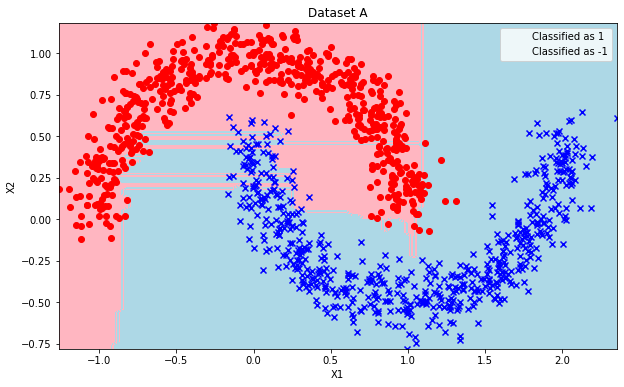

Dataset: B


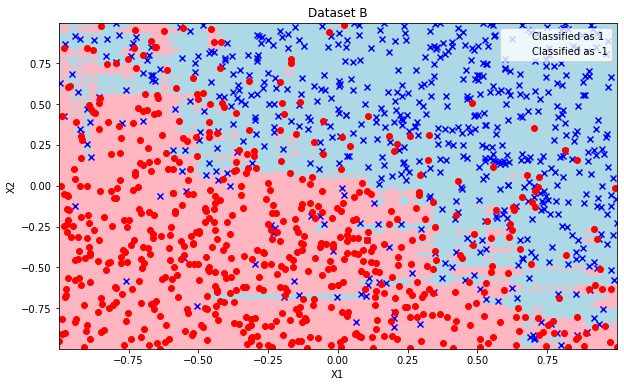

In [64]:
## Codewrite cell: Generate plots of learned Random Forest classifier on /content/Data/dataset_A and /content/Data/dataset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to Bishop Figure 4.5 (with just two classes here).
# Total number of plots = 2

def split_data(X, Y, train_ratio=0.8):
    split_idx = int(train_ratio * len(X))
    X_train, X_valid = X[:split_idx], X[split_idx:]
    Y_train, Y_valid = Y[:split_idx], Y[split_idx:]
    return X_train, X_valid, Y_train, Y_valid

data_names = ["/content/Data/dataset_A.npz", "/content/Data/dataset_B.npz"]
labels = ["A", "B"]

for data_name, label in zip(data_names, labels):
    print("Dataset:", label)
    data = np.load(data_name)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    X_tr, X_va, Y_tr, Y_va = split_data(X_train, Y_train)

    tree_sizes = [100, 150, 200, 300, 490] if X_tr.shape[1] == 2 else [50, 100, 150, 200]

    # Tuning
    num_trees, error, forest = choose_best_hyper_parameters_r(X_tr, Y_tr, X_va, Y_va, tree_sizes, crit='accuracy')

    #Evaluation
    Y_pred_test = eval_random_forest(forest, X_test)

    n1, n2 = 100, 100
    x1 = np.linspace(np.min(X_tr[:, 0]), np.max(X_tr[:, 0]), n1)
    x2 = np.linspace(np.min(X_tr[:, 1]), np.max(X_tr[:, 1]), n2)
    x1, x2 = np.meshgrid(x1, x2)
    x_meshgrid = np.c_[x1.ravel(), x2.ravel()]

    Y_meshgrid_pred = eval_random_forest(forest,x_meshgrid) 
    Y_meshgrid_pred = Y_meshgrid_pred.reshape((n1, n2))

    plt.figure(figsize=(10, 6))
    plt.title("Dataset " + label)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.contourf(x1, x2, Y_meshgrid_pred, colors=["lightpink", "lightblue"])
    plt.scatter(X_tr[Y_tr == 1][:, 0], X_tr[Y_tr == 1][:, 1], c="b", label="Y = 1", marker='x')
    plt.scatter(X_tr[Y_tr == -1][:, 0], X_tr[Y_tr == -1][:, 1], c="r", label="Y = -1", marker='o')
    plt.legend(["Classified as 1", "Classified as -1"], loc="upper right")
    plt.show()


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [116]:
# Codewrite cell
# Write code to run here (no plotting)

def h_func(x):
    if x == 0 or x == 1:
        return 0
    return x*np.log2(x) + (1-x)*np.log2(1-x)

def weak_learner(X_train, Y_train, X_test, W, depth):
  tree = train_dt_depth(X_train,Y_train, W, depth)
  pred = eval_decision_tree(tree, X_test)
  return pred,tree

def train_dt_depth(X, Y, W, depth, criterion='accuracy'):
    tree = {}
    init_val = -1
    tree[0] = [init_val]*3
    split_node_ada(tree, 0, X, Y, W, 0, 1 , criterion, depth)
    return tree

def eval_decision_tree(tree, test_X):
    n = test_X.shape[0]
    Y_pred = np.zeros(n)
    for i in range(n):
        Y_pred[i] = pred_class(tree, 0, test_X[i])
    return Y_pred


neg = 0
pos = 0
def split_node_ada(tree, node_pos, X, Y, W, depth, num_nodes_stop = 1, criterion = 'accuracy', stop_depth = 1e7):
    global neg, pos
    n = int(np.sum(W))
    n_total, d = X.shape
    total_pos = int(np.sum(W[(Y == 1)]))
    total_neg = int(np.sum(W[(Y == -1)]))
    one_class = False
    if total_pos == 0 or total_pos == n:
        one_class = True
    if n <= num_nodes_stop or depth >= stop_depth or ((pos == total_pos) and (neg == total_neg)) or one_class:
        if total_pos > total_neg:
            class_pred = 1
        else:
            class_pred = -1
        tree[node_pos] = [-1,-1, class_pred]
        return

    neg = total_neg
    pos = total_pos
    best_feat = 0
    best_thresh = 0
    best_acc = -np.inf
    for feat in range(d):
        ids = X[:, feat].argsort()
        X = X[ids]
        Y = Y[ids]
        W = W[ids]
        min_feat = X[0][feat]
        max_feat = X[-1][feat]
        num_pts  = 11
        iter = (max_feat - min_feat)/num_pts
        for pt in range(1, num_pts):
            thresh = min_feat + pt*iter
            pos_l = 0
            left = 0
            for sample in range(n_total):
                if X[sample][feat] <= thresh:
                    left += (W[sample])
                    if Y[sample] > 0:
                        pos_l += (W[sample])
            pos_r = total_pos - pos_l
            right = n - left
            dec = split_ada(criterion, pos_l, left, pos_r, right)
            if dec >= best_acc:
                best_acc = dec
                best_feat = feat
                best_thresh = thresh
    ind = (X[:, best_feat] <= best_thresh)
    X_left = X[ind]
    Y_left = Y[ind]
    W_left = W[ind]
    ind = (X[:, best_feat] > best_thresh)
    X_right = X[ind]
    Y_right = Y[ind]
    W_right = W[ind]
    tree[node_pos] = [best_feat, best_thresh, 0]
    split_node_ada(tree, 2*node_pos+1, X_left, Y_left, W_left, depth+1, num_nodes_stop, criterion, stop_depth)
    split_node_ada(tree, 2*node_pos+2, X_right, Y_right, W_right, depth+1, num_nodes_stop, criterion, stop_depth)

def split_ada(criterion, pos_l, left, pos_r, right):
    if criterion == 'accuracy':
        val = (pos_l + right - pos_r)/(left+right)
        return max(val, 1-val)
    elif criterion == 'entropy':
        p_l = left/(left+right)
        h_l = h_func(pos_l/(left+1e-40))
        p_r = 1 - p_l
        h_r = h_func(pos_r/(right+1e-40))
        return (p_l*h_l + p_r*h_r)


def adaboost(X, Y, depth):
  n = X.shape[0]
  W = np.ones(n)
  beta = np.zeros(50)
  learner = {}
  #print(2, depth)
  for i in range(50) :
    Y_pred, learner[i] = weak_learner(X, Y, X, W, depth)
    L = abs(Y-Y_pred)/2
    gamma = 1/2 - (W @ L.T)/(np.sum(W) + 1e-50)
    beta[i] = (0.5 + gamma)/(0.5 - gamma + 1e-50)
    W = [w*(beta[i]**int(L[j])) for j,w in enumerate(W)]
    W = np.array(W)
  return np.log(beta), learner

def pred_class(tree, node_pos, sample):
    if tree[node_pos][0] == -1:
        return tree[node_pos][2]
    loc = tree[node_pos][0]
    thresh = tree[node_pos][1]
    if sample[loc] <= thresh:
        return pred_class(tree, 2*node_pos+1, sample)
    else:
        return pred_class(tree, 2*node_pos+2, sample)

def run_ada_iter(beta, learner, X_test):
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    preds = []
    for n in range(n_iter_tot) :
        pred = np.zeros(m)
        for j in range(m) :
            prediction = np.array([pred_class(learner[i],0,X_test[j]) for i in range(n+1)])
            pred[j] = prediction@beta[:n+1].T
        pred = np.sign(pred)
        preds.append(pred)
    return preds

def run_ada(beta, learner, X_test):
    m = X_test.shape[0]
    n_iter_tot = len(learner)
    pred = np.zeros(m)
    for j in range(m) :
        prediction = np.array([pred_class(learner[i], 0, X_test[j]) for i in range(n_iter_tot)])
        pred[j] = prediction@beta[:n_iter_tot+1].T
    pred = np.sign(pred)
    return pred

def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return mean, (std + 1e-20)

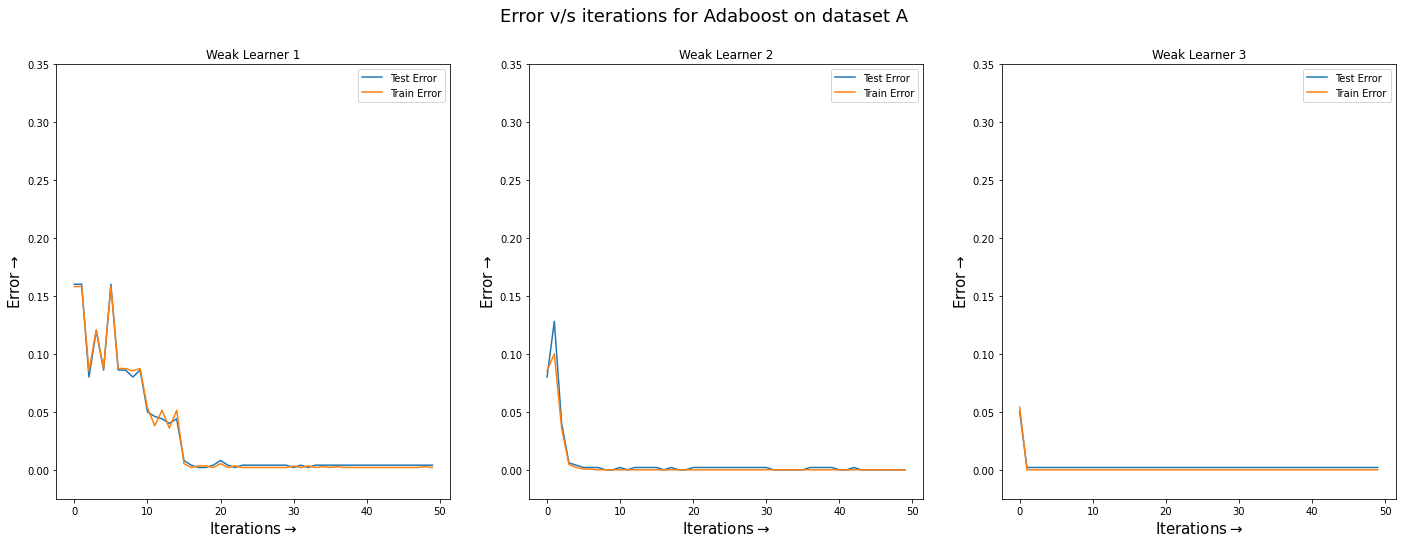

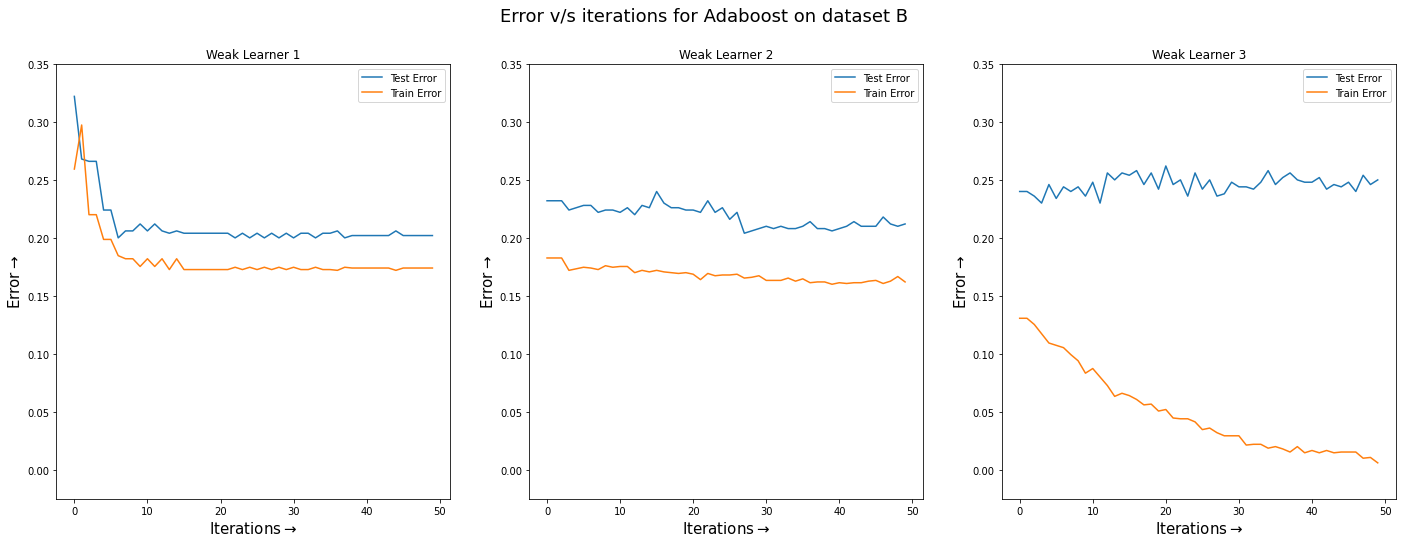

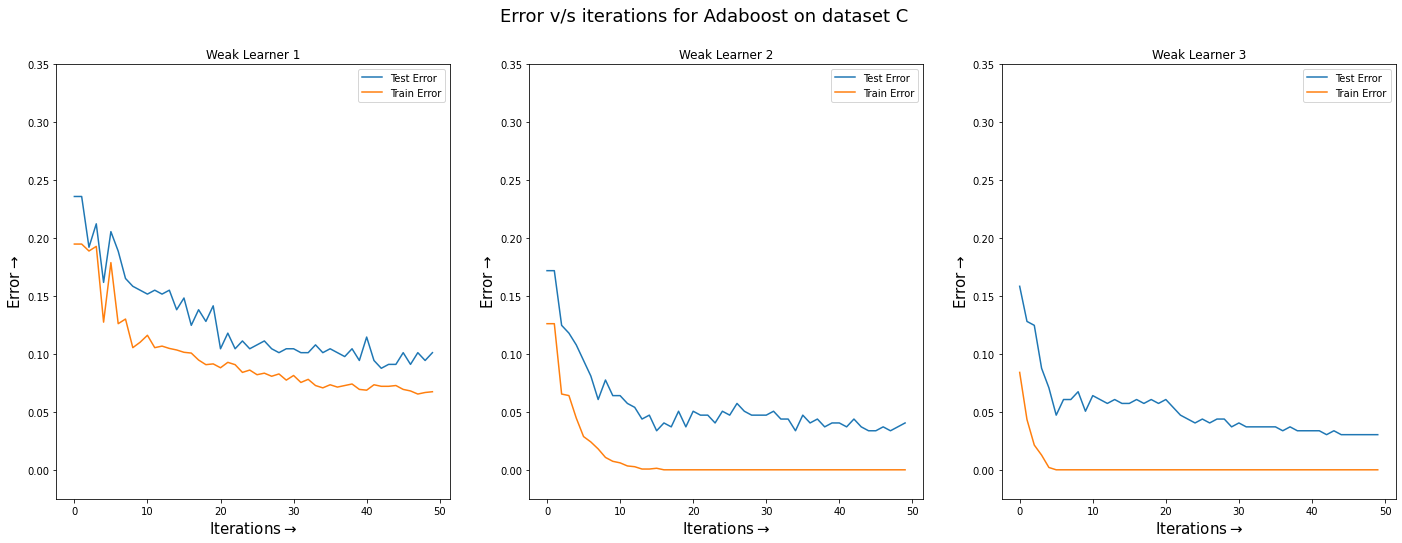

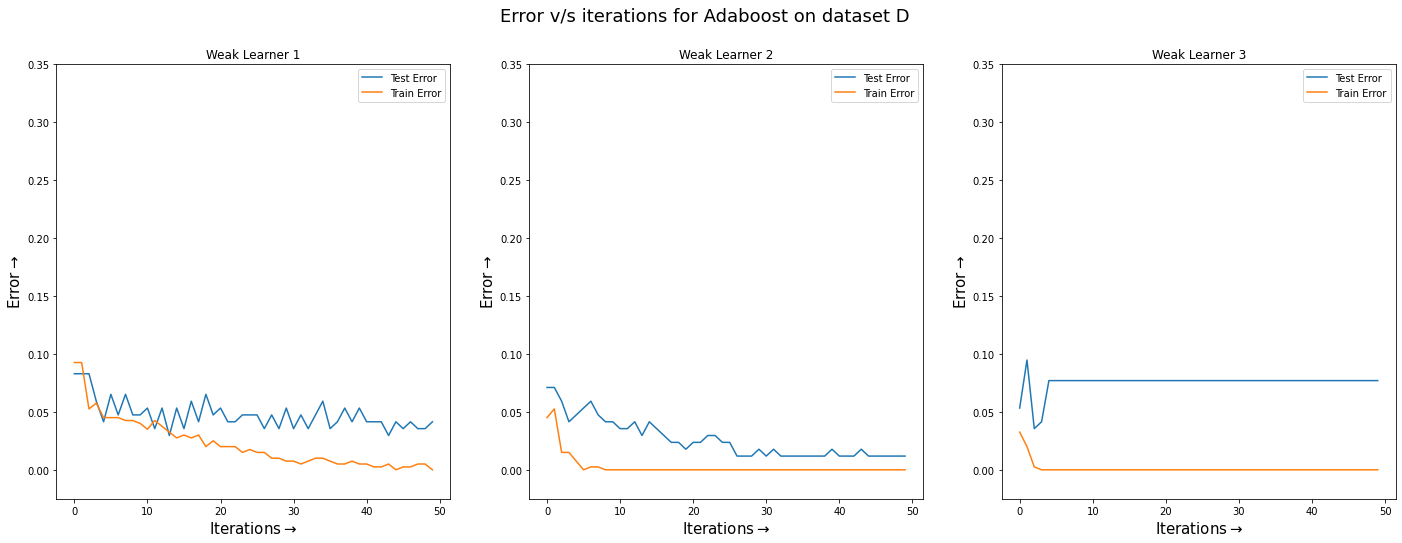

In [117]:
# Codewrite cell 
# Plots for iteration vs error here


def preprocess(file):
    data = np.load(file)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    mean, std = standardize(X_train)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, Y_train, X_test, Y_test

file_num = ['A','B','C','D']
num_learners = 3
X_train = {}
Y_train = {}
X_test = {}
Y_test = {}
train_error = np.zeros((len(file_num), num_learners))
test_error = np.zeros((len(file_num), num_learners))
train_errs = {}
test_errs = {}
betas = {}
learners = {}
for id in range(len(file_num)):
    X_tr, Y_tr, X_tst, Y_tst = preprocess( f"dataset_{file_num[id]}.npz")
    X_train[id], Y_train[id], X_test[id], Y_test[id] = X_tr, Y_tr, X_tst, Y_tst
    n = X_train[id].shape[0]
    plt.figure(figsize = (24,8))
    ttl = 'Error v/s iterations for Adaboost on dataset ' + file_num[id] 
    plt.suptitle(ttl, size = 18)
    for k, depth in enumerate([1,3,7]):
        plt.subplot(1,3,k+1)
        plt.gca().set_title(f"Weak Learner {k+1}")
        plt.gca().set_ylim([-0.025,0.3500])
        plt.gca().set_xlabel("Iterations" + r'$\rightarrow$', size = 15)
        plt.gca().set_ylabel("Error"+ r'$\rightarrow$', size = 15)
        samples = np.append(X_train[id], X_test[id], axis=0)
        betas[(id,k)], learners[(id,k)] = adaboost(X_train[id], Y_train[id], depth)
        Y_ret = run_ada_iter(betas[(id,k)],learners[(id,k)], samples)
        train_err_temp = []
        test_err_temp = []
        for Y_pred in Y_ret:
            Y_pred1 = Y_pred[:n]
            Y_pred2 = Y_pred[n:]
            err1 = np.sum(Y_pred1 != Y_train[id])/Y_train[id].shape[0]
            train_err_temp.append(err1)
            err2 = np.sum(Y_pred2 != Y_test[id])/Y_test[id].shape[0]
            test_err_temp.append(err2)
        x = [(i+1) for i in range(50)]
        plt.plot(np.array(test_err_temp), label = "Test Error")
        plt.plot(np.array(train_err_temp), label = "Train Error")
        train_errs[(id,k)] = train_err_temp
        test_errs[(id,k)] = test_err_temp
        plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

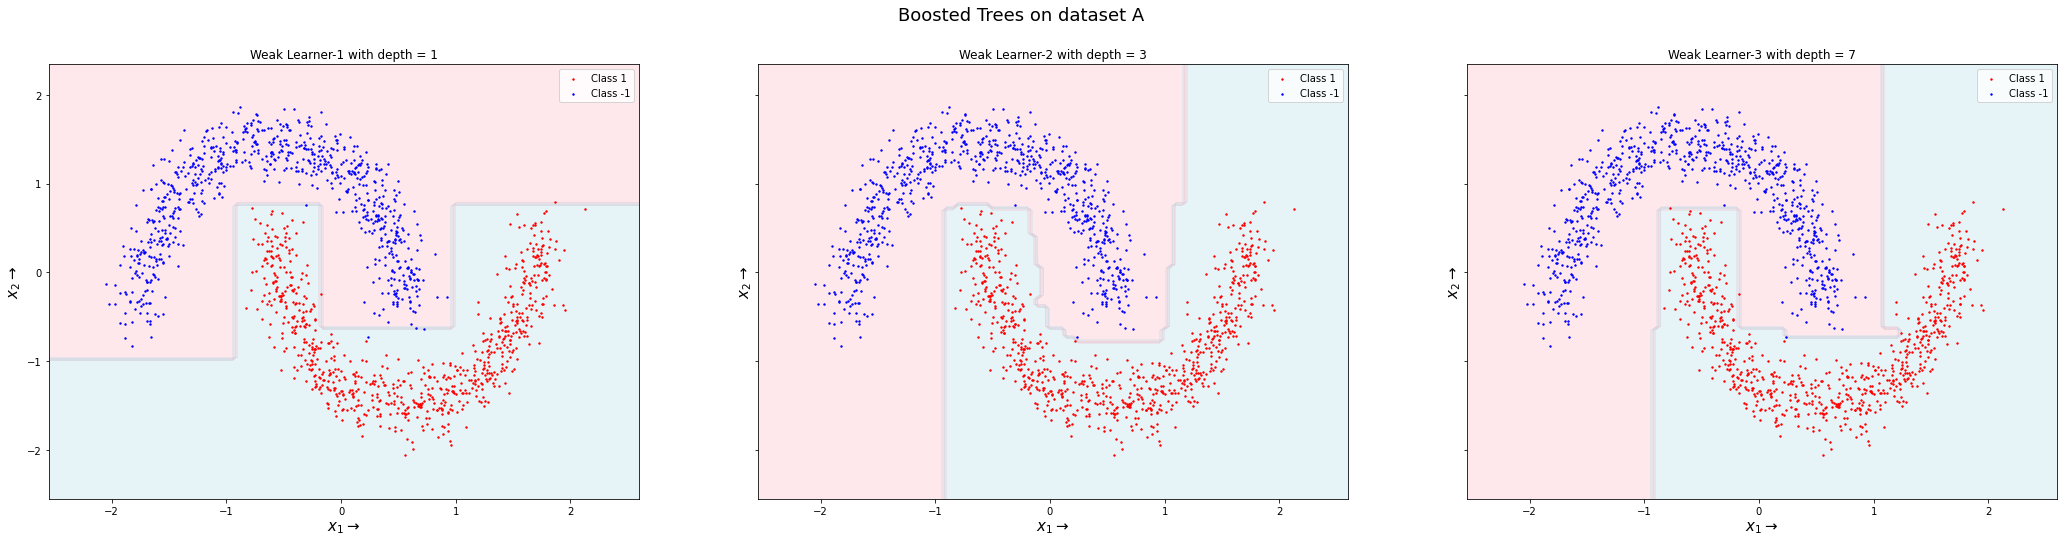

<Figure size 432x288 with 0 Axes>

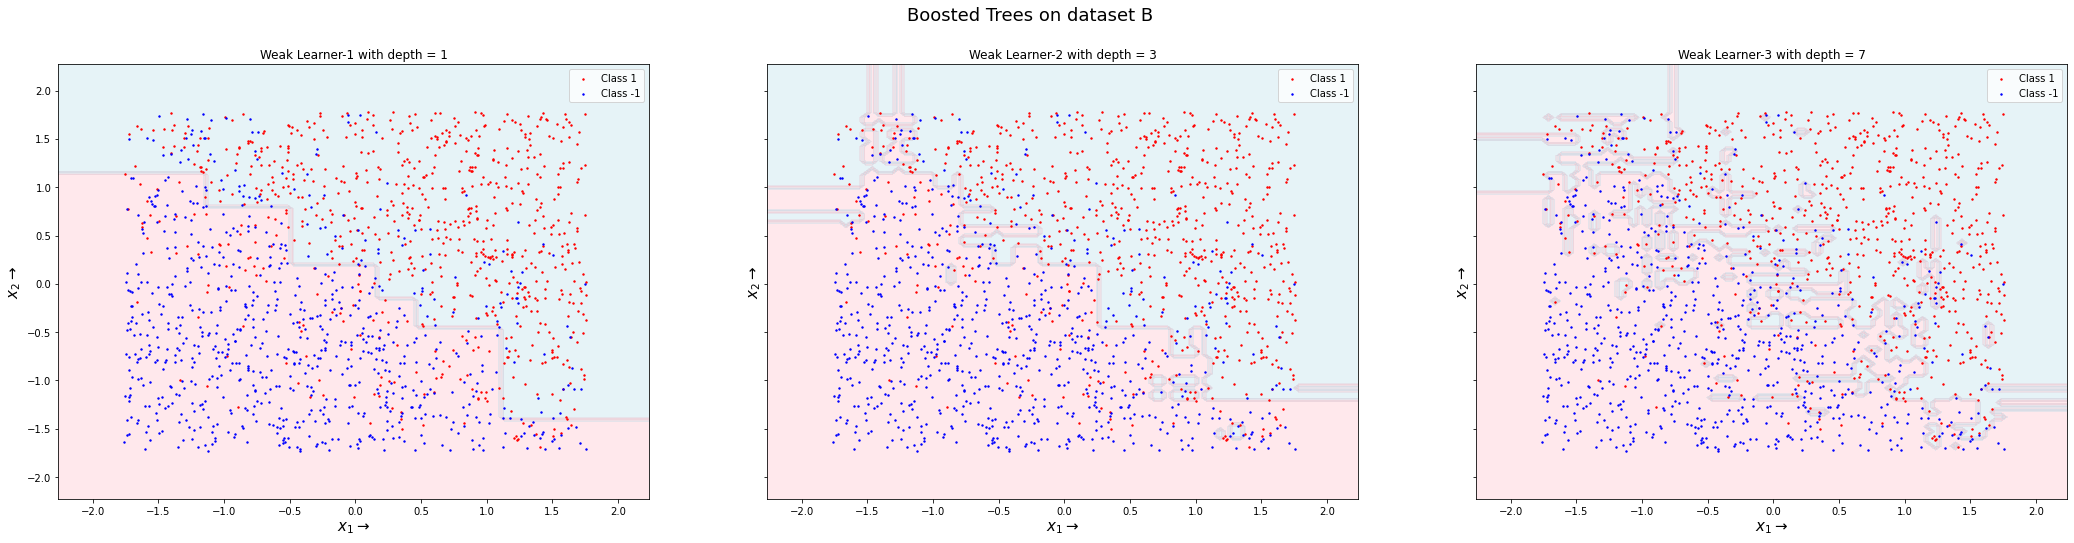

In [119]:
# Codewrite cell 
# Plots for illustrating the classifier here
X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_A.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(0,0)],learners[(0,0)], testing_set)
y_pred_2 = run_ada(betas[(0,1)],learners[(0,1)], testing_set)
y_pred_3 = run_ada(betas[(0,2)],learners[(0,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(36,8))
f.suptitle('Boosted Trees on dataset A', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='red', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()


X_train, Y_train, X_test, Y_test = preprocess('/content/Data/dataset_B.npz')
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
testing_set= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
y_pred_1 = run_ada(betas[(1,0)],learners[(1,0)], testing_set)
y_pred_2 = run_ada(betas[(1,1)],learners[(1,1)], testing_set)
y_pred_3 = run_ada(betas[(1,2)],learners[(1,2)], testing_set)
plt.figure(0)
f, ax = plt.subplots(1,3,sharex=False,sharey=True,figsize=(36,8))
f.suptitle('Boosted Trees on dataset B', size = 18)
ax[0].contourf(X,Y,y_pred_1.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
ax[1].contourf(X,Y,y_pred_2.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
ax[2].contourf(X,Y,y_pred_3.reshape(X.shape), colors=["lightpink", "lightblue"], alpha=0.3)
learner_order = [1,2,3]
depths = [1,3,7]
for i, a in enumerate(ax):
    a.scatter(X_train[Y_train==1][:,0], X_train[Y_train==1][:,1], s=2,c='red', label='Class 1')
    a.scatter(X_train[Y_train==-1][:,0], X_train[Y_train==-1][:,1], s=2, c='blue',label='Class -1')
    a.set_title(f'Weak Learner-{learner_order[i]} with depth = {depths[i]}')
    a.set_xlabel(r'$x_{1}\rightarrow$',size=15)
    a.set_ylabel(r'$x_{2}\rightarrow$',size=15)
    a.legend()
plt.show()

Textwrite cell:
## Observations

- The Error v/s Iterations plot shows that after a few iterations, even a seemingly simple classifier like the one node decision tree can be boosted to perform similarly to random forests.
- The majority of weak learner and dataset combinations only require a few iterations before the errors converge to a constant value, indicating that boosting provides a rapid path to the best performance.
- Weak learner-3 only reduces the train error for dataset B; the test error remains high. Overfitting may be to blame, in which case a 1 node decision tree performs better on test data.
- Deeper trees converge faster while training
- Weak Learner-1, with a depth of 1, can provide relatively straightforward decision boundaries, whereas Weak Learner 3, with a depth of 7, can provide incredibly complex decision boundaries.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [27]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

[0.  0.  0.5 1.5]


In [30]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w
data = np.load('LassoReg_data.npz')
X = data['arr_0']  # Features (120 x 1000)
y = data['arr_1']  # Targets (120 x 1)

n_samples = X.shape[0]
n_train = n_samples // 2
n_val = (n_samples - n_train) // 2
n_test = n_samples - n_train - n_val

indices = np.arange(n_samples)
np.random.shuffle(indices)

train_indices = indices[:n_train]
val_indices = indices[n_train:n_train + n_val]
test_indices = indices[n_train + n_val:]

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

def mean_squared_error(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    
    return mse

In [36]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set
#lasso Regression using gradient descent
def lasso_regression(X, y, l1_norm, learning_rate, num_iters=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights

    for _ in range(num_iters):
        # Compute gradient
        y_pred = np.dot(X, w)
        grad = -2 * np.dot(X.T, (y - y_pred))
        
        # Update weights with projected gradient descent
        w -= learning_rate * grad
        w = projection_oracle_l1(w, l1_norm)
    
    return w

# Hyperparameters
learning_rates = [0.001, 0.01, 0.1]
l1_norms = [0.1, 0.5, 1.0,1.5,2.0]

best_val_error = float('inf')
best_params = (None, None)

#Tuning
for lr in learning_rates:
    for l1 in l1_norms:
        weights = lasso_regression(X_train, y_train, l1_norm=l1, learning_rate=lr)
        #MSE on validation set
        y_val_pred = np.dot(X_val, weights)
        val_error = mean_squared_error(y_val, y_val_pred)

        if val_error < best_val_error:
            best_val_error = val_error
            best_params = (lr, l1)

# Training on best hyperparameter
best_lr, best_l1 = best_params
final_weights = lasso_regression(X_train, y_train, l1_norm=best_l1, learning_rate=best_lr)

# Evaluate on test set
y_test_pred = np.dot(X_test, final_weights)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Test Error (MSE) with best model: {test_error:.4f}")

top_indices = np.argsort(np.abs(final_weights))[::-1][:10]#absolute values of weights are taken to find important features
top_weights = final_weights[top_indices]

print("Top 10 Weight Indices:", top_indices)
print("Top 10 Weight Values:", top_weights)

Test Error (MSE) with best model: 0.0051
Top 10 Weight Indices: [107 390 760 566 138 528 859 996 340 100]
Top 10 Weight Values: [ 0.93915812  0.31037894 -0.15607957  0.06829913  0.00792161  0.00482396
 -0.00430312 -0.0041932  -0.00229597 -0.00178721]


#Textwrite cell:

Chosen Learning rate = 0.001
Chosen L1 norm radii = 1.5
Test Error(MSE) = 0.051

For absolute value of weights,
Top 10 Weight Indices: [107 390 760 566 138 528 859 996 340 100]
Top 10 Weights: [ 0.93915812  0.31037894 -0.15607957  0.06829913  0.00792161  0.00482396
 -0.00430312 -0.0041932  -0.00229597 -0.00178721]
